### Sourav Pandey
### 1928265

### Problem Statement

The dataset belongs to a leading life insurance company. The company wants to
predict the bonus for its agents so that it may design appropriate engagement activity
for their high performing agents and upskill programs for low performing agents.

### Importing libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Importing Data

In [2]:
df=pd.read_excel('Sales_Data_EDA.xlsx',sheet_name='Sales')

###  Data Info - Types of Features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

### Dataset Head

In [4]:
df.head(11).T

0                    1              2   \
CustID                    7000000              7000001        7000002   
AgentBonus                   4409                 2214           4273   
Age                          22.0                 11.0           26.0   
CustTenure                    4.0                  2.0            4.0   
Channel                     Agent  Third Party Partner          Agent   
Occupation               Salaried             Salaried    Free Lancer   
EducationField           Graduate             Graduate  Post Graduate   
Gender                     Female                 Male           Male   
ExistingProdType                3                    4              4   
Designation               Manager              Manager            Exe   
NumberOfPolicy                2.0                  4.0            3.0   
MaritalStatus              Single             Divorced      Unmarried   
MonthlyIncome             20993.0              20130.0        17090.0   
Complaint                       1                    0              1   
ExistingPolicyTenure          2.0                  3.0            2.0   
SumAssured               806761.0             294502.0            NaN   
Zone                        North                North          North   
PaymentMethod         Half Yearly               Yearly         Yearly   
LastMonthCalls                  5                    7              0   
CustCareScore                 2.0                  3.0            3.0   

                                       3               4   \
CustID                            7000003         7000004   
AgentBonus                           1791            2955   
Age                                  11.0             6.0   
CustTenure                            NaN             NaN   
Channel               Third Party Partner           Agent   
Occupation                       Salaried  Small Business   
EducationField                   Graduate              UG   
Gender                            Fe male            Male   
ExistingProdType                        3               3   
Designation                     Executive       Executive   
NumberOfPolicy                        3.0             4.0   
MaritalStatus                    Divorced        Divorced   
MonthlyIncome                     17909.0         18468.0   
Complaint                               1               0   
ExistingPolicyTenure                  2.0             4.0   
SumAssured                       268635.0        366405.0   
Zone                                 West            West   
PaymentMethod                 Half Yearly     Half Yearly   
LastMonthCalls                          0               2   
CustCareScore                         5.0             5.0   

                                       5         6               7         8   \
CustID                            7000005   7000006         7000007   7000008   
AgentBonus                           3252      3850            2073      2719   
Age                                   7.0      12.0             6.0       8.0   
CustTenure                            NaN      23.0             4.0      11.0   
Channel               Third Party Partner     Agent           Agent     Agent   
Occupation                       Salaried  Salaried  Small Business  Salaried   
EducationField                   Graduate  Graduate  Under Graduate  Graduate   
Gender                               Male      Male          Female      Male   
ExistingProdType                        3         4               3         4   
Designation                     Executive        VP       Executive   Manager   
NumberOfPolicy                        2.0       3.0             4.0       3.0   
MaritalStatus                      Single  Divorced       Unmarried  Divorced   
MonthlyIncome                     18068.0   34999.0         17279.0   20916.0   
Complaint                               0         0               0         1   


In [5]:
df.describe()

CustID   AgentBonus          Age   CustTenure  ExistingProdType  \
count  4.520000e+03  4520.000000  4251.000000  4294.000000       4520.000000   
mean   7.002260e+06  4077.838274    14.494707    14.469027          3.688938   
std    1.304956e+03  1403.321711     9.037629     8.963671          1.015769   
min    7.000000e+06  1605.000000     2.000000     2.000000          1.000000   
25%    7.001130e+06  3027.750000     7.000000     7.000000          3.000000   
50%    7.002260e+06  3911.500000    13.000000    13.000000          4.000000   
75%    7.003389e+06  4867.250000    20.000000    20.000000          4.000000   
max    7.004519e+06  9608.000000    58.000000    57.000000          6.000000   

       NumberOfPolicy  MonthlyIncome    Complaint  ExistingPolicyTenure  \
count     4475.000000    4284.000000  4520.000000           4336.000000   
mean         3.565363   22890.309991     0.287168              4.130074   
std          1.455926    4885.600757     0.452491              3.346386   
min          1.000000   16009.000000     0.000000              1.000000   
25%          2.000000   19683.500000     0.000000              2.000000   
50%          4.000000   21606.000000     0.000000              3.000000   
75%          5.000000   24725.000000     1.000000              6.000000   
max          6.000000   38456.000000     1.000000             25.000000   

         SumAssured  LastMonthCalls  CustCareScore  
count  4.366000e+03     4520.000000    4468.000000  
mean   6.199997e+05        4.626991       3.067592  
std    2.462348e+05        3.620132       1.382968  
min    1.685360e+05        0.000000       1.000000  
25%    4.394432e+05        2.000000       2.000000  
50%    5.789765e+05        3.000000       3.000000  
75%    7.582360e+05        8.000000       4.000000  
max    1.838496e+06       18.000000       5.000000

### Shape of data

In [6]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 4520 
The number of columns (variables) is 20


### Dropping Column

In [7]:
df.drop(['CustID'],axis=1,inplace=True)

### Measures of Central Tendency

In [8]:
pd.set_option('max_rows', None)
pd.options.display.float_format = '{:.2f}'.format   
df.describe(include='all').T

count unique          top  freq      mean       std  \
AgentBonus           4520.00    NaN          NaN   NaN   4077.84   1403.32   
Age                  4251.00    NaN          NaN   NaN     14.49      9.04   
CustTenure           4294.00    NaN          NaN   NaN     14.47      8.96   
Channel                 4520      3        Agent  3194       NaN       NaN   
Occupation              4520      5     Salaried  2192       NaN       NaN   
EducationField          4520      7     Graduate  1870       NaN       NaN   
Gender                  4520      3         Male  2688       NaN       NaN   
ExistingProdType     4520.00    NaN          NaN   NaN      3.69      1.02   
Designation             4520      6      Manager  1620       NaN       NaN   
NumberOfPolicy       4475.00    NaN          NaN   NaN      3.57      1.46   
MaritalStatus           4520      4      Married  2268       NaN       NaN   
MonthlyIncome        4284.00    NaN          NaN   NaN  22890.31   4885.60   
Complaint            4520.00    NaN          NaN   NaN      0.29      0.45   
ExistingPolicyTenure 4336.00    NaN          NaN   NaN      4.13      3.35   
SumAssured           4366.00    NaN          NaN   NaN 619999.70 246234.82   
Zone                    4520      4         West  2566       NaN       NaN   
PaymentMethod           4520      4  Half Yearly  2656       NaN       NaN   
LastMonthCalls       4520.00    NaN          NaN   NaN      4.63      3.62   
CustCareScore        4468.00    NaN          NaN   NaN      3.07      1.38   

                           min       25%       50%       75%        max  
AgentBonus             1605.00   3027.75   3911.50   4867.25    9608.00  
Age                       2.00      7.00     13.00     20.00      58.00  
CustTenure                2.00      7.00     13.00     20.00      57.00  
Channel                    NaN       NaN       NaN       NaN        NaN  
Occupation                 NaN       NaN       NaN       NaN        NaN  
EducationField             NaN       NaN       NaN       NaN        NaN  
Gender                     NaN       NaN       NaN       NaN        NaN  
ExistingProdType          1.00      3.00      4.00      4.00       6.00  
Designation                NaN       NaN       NaN       NaN        NaN  
NumberOfPolicy            1.00      2.00      4.00      5.00       6.00  
MaritalStatus              NaN       NaN       NaN       NaN        NaN  
MonthlyIncome         16009.00  19683.50  21606.00  24725.00   38456.00  
Complaint                 0.00      0.00      0.00      1.00       1.00  
ExistingPolicyTenure      1.00      2.00      3.00      6.00      25.00  
SumAssured           168536.00 439443.25 578976.50 758236.00 1838496.00  
Zone                       NaN       NaN       NaN       NaN        NaN  
PaymentMethod              NaN       NaN       NaN       NaN        NaN  
LastMonthCalls            0.00      2.00      3.00      8.00      18.00  
CustCareScore             1.00      2.00      3.00      4.00       5.00

### Unique Value of Categorical Variables


In [9]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column,': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

Channel :  3
Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64


Occupation :  5
Free Lancer           2
Laarge Business     153
Large Business      255
Small Business     1918
Salaried           2192
Name: Occupation, dtype: int64


EducationField :  7
MBA                 74
UG                 230
Post Graduate      252
Engineer           408
Diploma            496
Under Graduate    1190
Graduate          1870
Name: EducationField, dtype: int64


Gender :  3
Fe male     325
Female     1507
Male       2688
Name: Gender, dtype: int64


Designation :  6
Exe                127
VP                 226
AVP                336
Senior Manager     676
Executive         1535
Manager           1620
Name: Designation, dtype: int64


MaritalStatus :  4
Unmarried     194
Divorced      804
Single       1254
Married      2268
Name: MaritalStatus, dtype: int64


Zone :  4
South       6
East       64
North    1884
West     2566
Name: Zone, dty

### Change Data Type

In [10]:
df['Complaint'] = df.Complaint.astype(object)

### Fixing Column Values

In [11]:
df['Gender'] = df['Gender'].replace(to_replace='Fe male',value='Female')

In [12]:
df['Occupation'] = df['Occupation'].replace(to_replace='Laarge Business',value='Large Business')

In [13]:
df['EducationField'] = df['EducationField'].replace(to_replace='UG',value='Under Graduate')

In [14]:
df['Designation'] = df['Designation'].replace(to_replace='Exe',value='Executive')

In [15]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column,': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

Channel :  3
Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64


Occupation :  4
Free Lancer          2
Large Business     408
Small Business    1918
Salaried          2192
Name: Occupation, dtype: int64


EducationField :  6
MBA                 74
Post Graduate      252
Engineer           408
Diploma            496
Under Graduate    1420
Graduate          1870
Name: EducationField, dtype: int64


Gender :  2
Female    1832
Male      2688
Name: Gender, dtype: int64


Designation :  5
VP                 226
AVP                336
Senior Manager     676
Manager           1620
Executive         1662
Name: Designation, dtype: int64


MaritalStatus :  4
Unmarried     194
Divorced      804
Single       1254
Married      2268
Name: MaritalStatus, dtype: int64


Complaint :  2
1    1298
0    3222
Name: Complaint, dtype: int64


Zone :  4
South       6
East       64
North    1884
West     2566
Name: Zone, dtype: int64


PaymentMethod

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   Age                   4251 non-null   float64
 2   CustTenure            4294 non-null   float64
 3   Channel               4520 non-null   object 
 4   Occupation            4520 non-null   object 
 5   EducationField        4520 non-null   object 
 6   Gender                4520 non-null   object 
 7   ExistingProdType      4520 non-null   int64  
 8   Designation           4520 non-null   object 
 9   NumberOfPolicy        4475 non-null   float64
 10  MaritalStatus         4520 non-null   object 
 11  MonthlyIncome         4284 non-null   float64
 12  Complaint             4520 non-null   object 
 13  ExistingPolicyTenure  4336 non-null   float64
 14  SumAssured            4366 non-null   float64
 15  Zone                 

In [17]:
pd.set_option('max_rows', None)
pd.options.display.float_format = '{:.2f}'.format   
df.describe(include='all').T

count unique          top    freq      mean       std  \
AgentBonus           4520.00    NaN          NaN     NaN   4077.84   1403.32   
Age                  4251.00    NaN          NaN     NaN     14.49      9.04   
CustTenure           4294.00    NaN          NaN     NaN     14.47      8.96   
Channel                 4520      3        Agent    3194       NaN       NaN   
Occupation              4520      4     Salaried    2192       NaN       NaN   
EducationField          4520      6     Graduate    1870       NaN       NaN   
Gender                  4520      2         Male    2688       NaN       NaN   
ExistingProdType     4520.00    NaN          NaN     NaN      3.69      1.02   
Designation             4520      5    Executive    1662       NaN       NaN   
NumberOfPolicy       4475.00    NaN          NaN     NaN      3.57      1.46   
MaritalStatus           4520      4      Married    2268       NaN       NaN   
MonthlyIncome        4284.00    NaN          NaN     NaN  22890.31   4885.60   
Complaint            4520.00   2.00         0.00 3222.00       NaN       NaN   
ExistingPolicyTenure 4336.00    NaN          NaN     NaN      4.13      3.35   
SumAssured           4366.00    NaN          NaN     NaN 619999.70 246234.82   
Zone                    4520      4         West    2566       NaN       NaN   
PaymentMethod           4520      4  Half Yearly    2656       NaN       NaN   
LastMonthCalls       4520.00    NaN          NaN     NaN      4.63      3.62   
CustCareScore        4468.00    NaN          NaN     NaN      3.07      1.38   

                           min       25%       50%       75%        max  
AgentBonus             1605.00   3027.75   3911.50   4867.25    9608.00  
Age                       2.00      7.00     13.00     20.00      58.00  
CustTenure                2.00      7.00     13.00     20.00      57.00  
Channel                    NaN       NaN       NaN       NaN        NaN  
Occupation                 NaN       NaN       NaN       NaN        NaN  
EducationField             NaN       NaN       NaN       NaN        NaN  
Gender                     NaN       NaN       NaN       NaN        NaN  
ExistingProdType          1.00      3.00      4.00      4.00       6.00  
Designation                NaN       NaN       NaN       NaN        NaN  
NumberOfPolicy            1.00      2.00      4.00      5.00       6.00  
MaritalStatus              NaN       NaN       NaN       NaN        NaN  
MonthlyIncome         16009.00  19683.50  21606.00  24725.00   38456.00  
Complaint                  NaN       NaN       NaN       NaN        NaN  
ExistingPolicyTenure      1.00      2.00      3.00      6.00      25.00  
SumAssured           168536.00 439443.25 578976.50 758236.00 1838496.00  
Zone                       NaN       NaN       NaN       NaN        NaN  
PaymentMethod              NaN       NaN       NaN       NaN        NaN  
LastMonthCalls            0.00      2.00      3.00      8.00      18.00  
CustCareScore             1.00      2.00      3.00      4.00       5.00

### Missing Value Treatment

In [18]:
print ('There are', df.isnull().sum().sum(),'missing values in the dataset')

There are 1166 missing values in the dataset


In [19]:
df.isnull().sum()[df.isnull().sum()>0]

Age                     269
CustTenure              226
NumberOfPolicy           45
MonthlyIncome           236
ExistingPolicyTenure    184
SumAssured              154
CustCareScore            52
dtype: int64

In [20]:
null_rows=0
for i in (df.isnull().sum(axis=1)):
    if i>0 :
        null_rows=null_rows+1
print (" Total Missing Rows ",null_rows)

 Total Missing Rows  1073


In [21]:
df[df.isnull().sum()[df.isnull().sum()>0].index].dtypes

Age                     float64
CustTenure              float64
NumberOfPolicy          float64
MonthlyIncome           float64
ExistingPolicyTenure    float64
SumAssured              float64
CustCareScore           float64
dtype: object

#### Replacing NULL values of numerical columns with the median values.

In [22]:
df["Age"].replace(np.nan,df["Age"].median(),inplace=True)
df["CustTenure"].replace(np.nan,df["CustTenure"].median(),inplace=True)
df["NumberOfPolicy"].replace(np.nan,df["NumberOfPolicy"].median(),inplace=True)
df["MonthlyIncome"].replace(np.nan,df["MonthlyIncome"].median(),inplace=True)
df["ExistingPolicyTenure"].replace(np.nan,df["ExistingPolicyTenure"].median(),inplace=True)
df["SumAssured"].replace(np.nan,df["SumAssured"].median(),inplace=True)
df["CustCareScore"].replace(np.nan,df["CustCareScore"].median(),inplace=True)

In [23]:
df.isnull().sum()

AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

### New Column - AgentPerformance

#### AgentPerformance is High if AgentBonus>median of AgentBonus else it is Low

In [24]:
df["AgentPerformance"]=np.where(df["AgentBonus"]>=np.mean(df['AgentBonus']),'High','Low')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   Age                   4520 non-null   float64
 2   CustTenure            4520 non-null   float64
 3   Channel               4520 non-null   object 
 4   Occupation            4520 non-null   object 
 5   EducationField        4520 non-null   object 
 6   Gender                4520 non-null   object 
 7   ExistingProdType      4520 non-null   int64  
 8   Designation           4520 non-null   object 
 9   NumberOfPolicy        4520 non-null   float64
 10  MaritalStatus         4520 non-null   object 
 11  MonthlyIncome         4520 non-null   float64
 12  Complaint             4520 non-null   object 
 13  ExistingPolicyTenure  4520 non-null   float64
 14  SumAssured            4520 non-null   float64
 15  Zone                 

In [26]:
pd.set_option('max_rows', None)
pd.options.display.float_format = '{:.2f}'.format   
df.describe(include='all').T

count unique          top    freq      mean       std  \
AgentBonus           4520.00    NaN          NaN     NaN   4077.84   1403.32   
Age                  4520.00    NaN          NaN     NaN     14.41      8.77   
CustTenure           4520.00    NaN          NaN     NaN     14.40      8.74   
Channel                 4520      3        Agent    3194       NaN       NaN   
Occupation              4520      4     Salaried    2192       NaN       NaN   
EducationField          4520      6     Graduate    1870       NaN       NaN   
Gender                  4520      2         Male    2688       NaN       NaN   
ExistingProdType     4520.00    NaN          NaN     NaN      3.69      1.02   
Designation             4520      5    Executive    1662       NaN       NaN   
NumberOfPolicy       4520.00    NaN          NaN     NaN      3.57      1.45   
MaritalStatus           4520      4      Married    2268       NaN       NaN   
MonthlyIncome        4520.00    NaN          NaN     NaN  22823.25   4764.89   
Complaint            4520.00   2.00         0.00 3222.00       NaN       NaN   
ExistingPolicyTenure 4520.00    NaN          NaN     NaN      4.08      3.29   
SumAssured           4520.00    NaN          NaN     NaN 618602.01 242117.25   
Zone                    4520      4         West    2566       NaN       NaN   
PaymentMethod           4520      4  Half Yearly    2656       NaN       NaN   
LastMonthCalls       4520.00    NaN          NaN     NaN      4.63      3.62   
CustCareScore        4520.00    NaN          NaN     NaN      3.07      1.38   
AgentPerformance        4520      2          Low    2474       NaN       NaN   

                           min       25%       50%       75%        max  
AgentBonus             1605.00   3027.75   3911.50   4867.25    9608.00  
Age                       2.00      8.00     13.00     19.00      58.00  
CustTenure                2.00      8.00     13.00     19.00      57.00  
Channel                    NaN       NaN       NaN       NaN        NaN  
Occupation                 NaN       NaN       NaN       NaN        NaN  
EducationField             NaN       NaN       NaN       NaN        NaN  
Gender                     NaN       NaN       NaN       NaN        NaN  
ExistingProdType          1.00      3.00      4.00      4.00       6.00  
Designation                NaN       NaN       NaN       NaN        NaN  
NumberOfPolicy            1.00      2.00      4.00      5.00       6.00  
MaritalStatus              NaN       NaN       NaN       NaN        NaN  
MonthlyIncome         16009.00  19858.00  21606.00  24531.75   38456.00  
Complaint                  NaN       NaN       NaN       NaN        NaN  
ExistingPolicyTenure      1.00      2.00      3.00      5.00      25.00  
SumAssured           168536.00 444476.25 578976.50 750010.50 1838496.00  
Zone                       NaN       NaN       NaN       NaN        NaN  
PaymentMethod              NaN       NaN       NaN       NaN        NaN  
LastMonthCalls            0.00      2.00      3.00      8.00      18.00  
CustCareScore             1.00      2.00      3.00      4.00       5.00  
AgentPerformance           NaN       NaN       NaN       NaN        NaN

### Outlier Detection

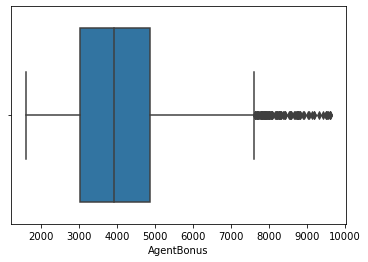

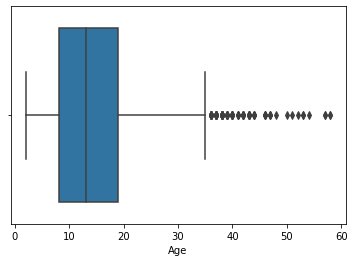

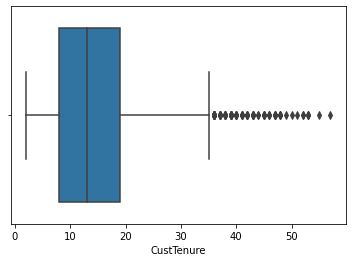

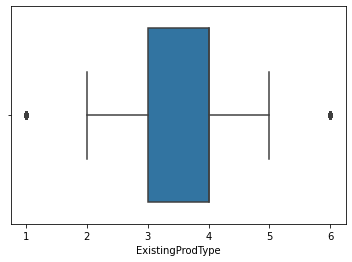

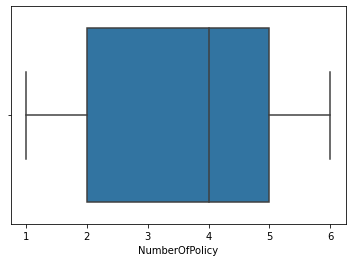

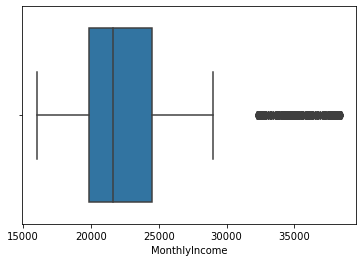

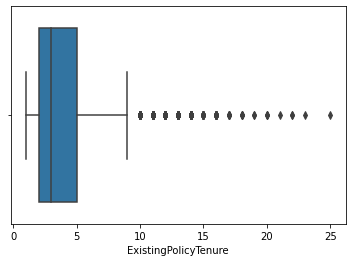

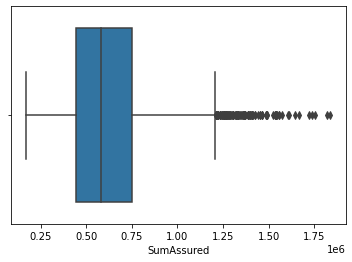

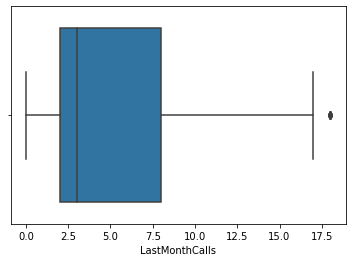

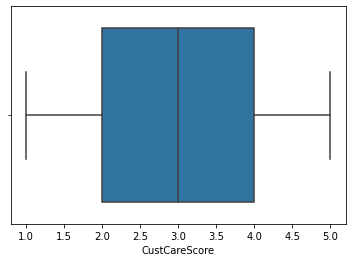

In [29]:
col_names = list(df.select_dtypes(exclude=['object']).columns)
# fig, ax = plt.subplots(len(col_names), figsize=(5,50))
for i,col_val in enumerate(col_names):
    sns.boxplot(df[col_val])
    ax[i].set_title('{}'.format(col_val), fontsize=8)
    plt.show()

In [30]:
col_names

['AgentBonus',
 'Age',
 'CustTenure',
 'ExistingProdType',
 'NumberOfPolicy',
 'MonthlyIncome',
 'ExistingPolicyTenure',
 'SumAssured',
 'LastMonthCalls',
 'CustCareScore']

### Outlier Treatment

In [31]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [32]:
for i,col_val in enumerate(col_names):
    lwr,upr=remove_outlier(df[col_val])
    df[col_val]=np.where(df[col_val]>upr,upr,df[col_val])
    df[col_val]=np.where(df[col_val]<lwr,lwr,df[col_val])
    print("Outlier fixed for ", col_val)

Outlier fixed for  AgentBonus
Outlier fixed for  Age
Outlier fixed for  CustTenure
Outlier fixed for  ExistingProdType
Outlier fixed for  NumberOfPolicy
Outlier fixed for  MonthlyIncome
Outlier fixed for  ExistingPolicyTenure
Outlier fixed for  SumAssured
Outlier fixed for  LastMonthCalls
Outlier fixed for  CustCareScore


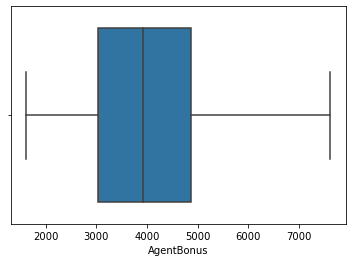

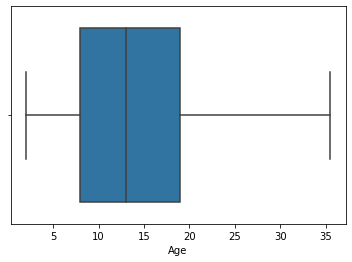

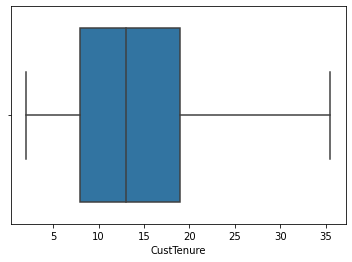

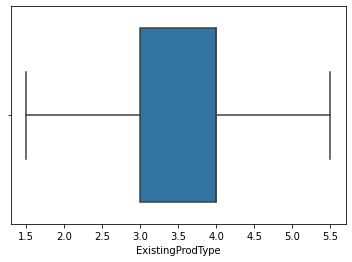

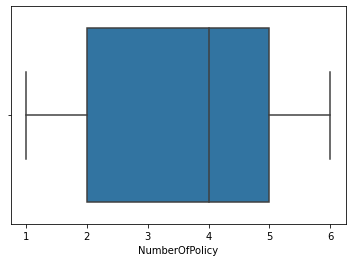

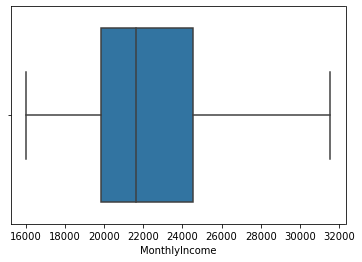

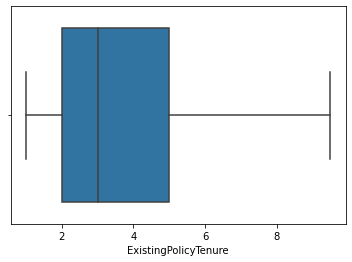

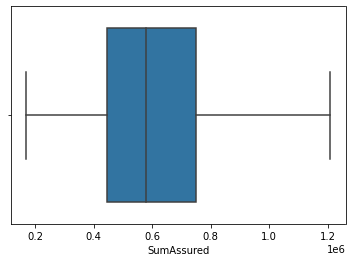

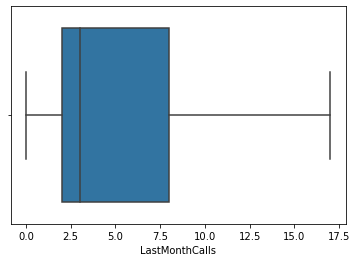

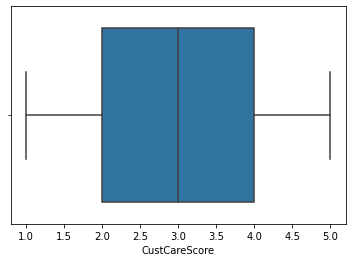

In [33]:
for i,col_val in enumerate(col_names):
    sns.boxplot(df[col_val])
    ax[i].set_title('{}'.format(col_val), fontsize=8)
    plt.show()

### Uni Variate Analysis

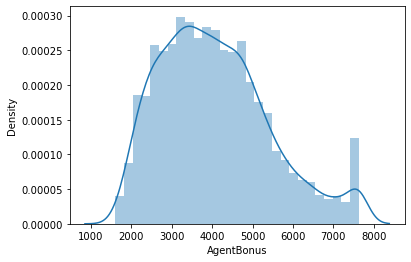

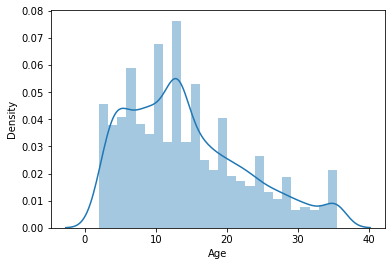

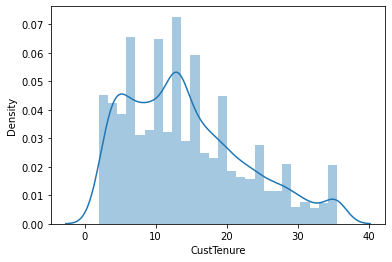

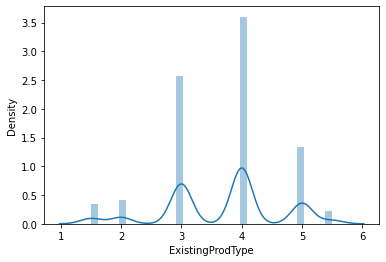

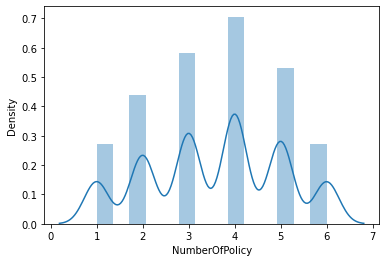

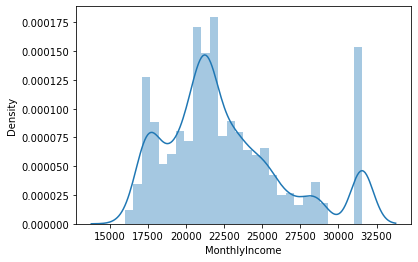

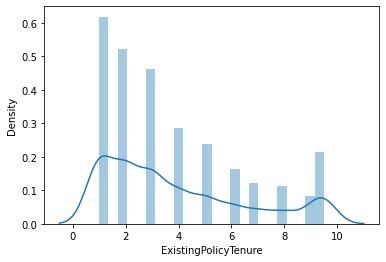

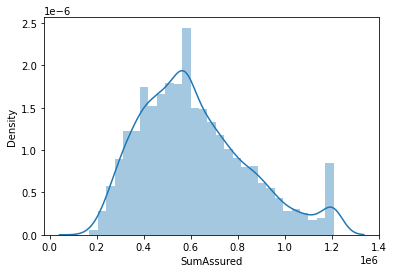

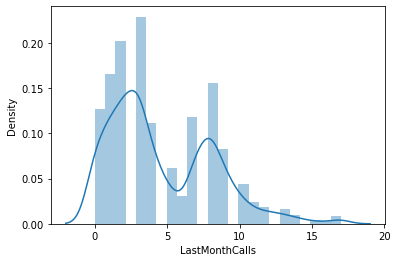

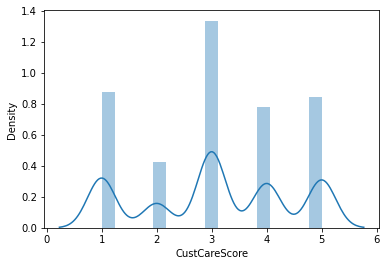

In [34]:
for i,col_val in enumerate(col_names):
    sns.distplot(df[col_val])
    plt.show()

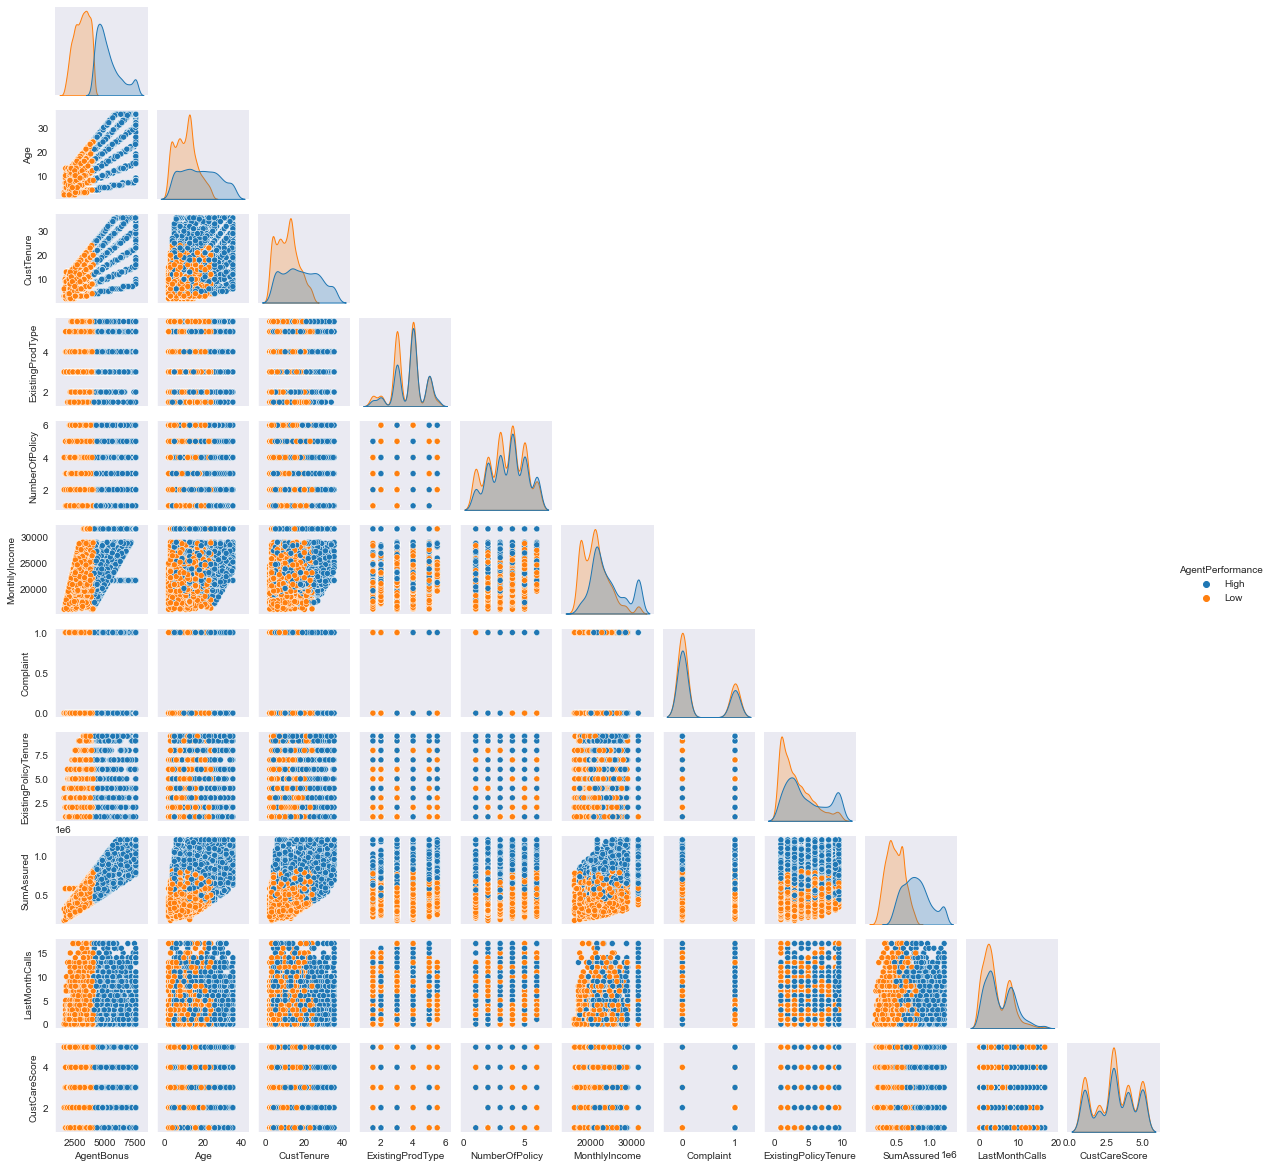

In [35]:
sns.set_style("dark")
sns.pairplot(df,hue="AgentPerformance",height=1.5,aspect=1,corner=True)

<AxesSubplot:xlabel='Zone', ylabel='count'>

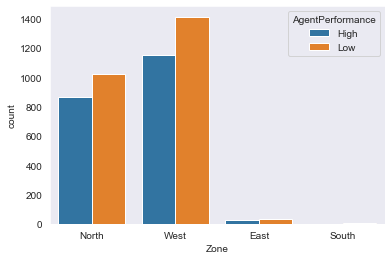

In [37]:
sns.countplot(df["Zone"],hue=df["AgentPerformance"])

<AxesSubplot:xlabel='Complaint', ylabel='count'>

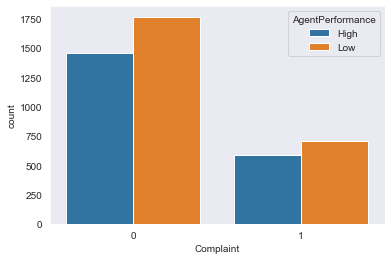

In [38]:
 sns.countplot(df["Complaint"],hue=df["AgentPerformance"])

<AxesSubplot:xlabel='EducationField', ylabel='count'>

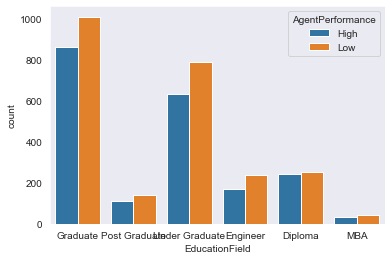

In [39]:
sns.countplot(df["EducationField"],hue=df["AgentPerformance"])

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

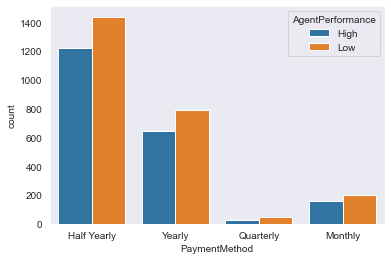

In [40]:
sns.countplot(df["PaymentMethod"],hue=df["AgentPerformance"]) 

<AxesSubplot:xlabel='Occupation', ylabel='count'>

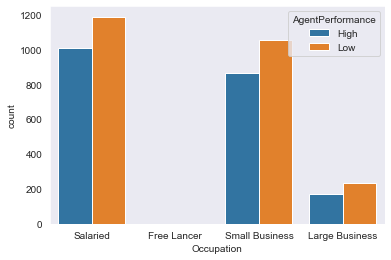

In [41]:
sns.countplot(df["Occupation"],hue=df["AgentPerformance"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

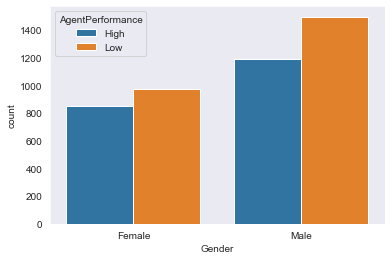

In [42]:
sns.countplot(df["Gender"],hue=df["AgentPerformance"])  

### Bivariate Analysis

In [43]:
col_names

['AgentBonus',
 'Age',
 'CustTenure',
 'ExistingProdType',
 'NumberOfPolicy',
 'MonthlyIncome',
 'ExistingPolicyTenure',
 'SumAssured',
 'LastMonthCalls',
 'CustCareScore']

#### Agent Performance

float64


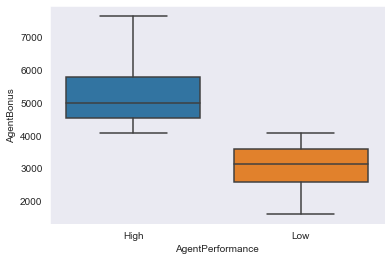

float64


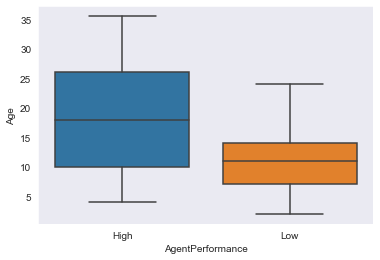

float64


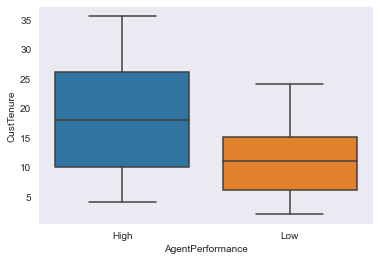

float64


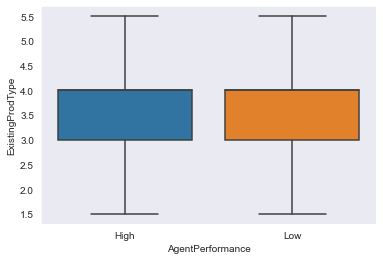

float64


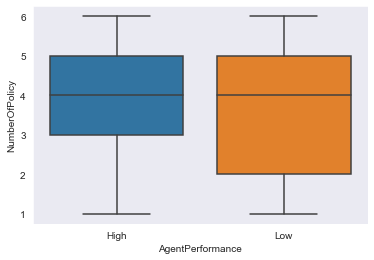

float64


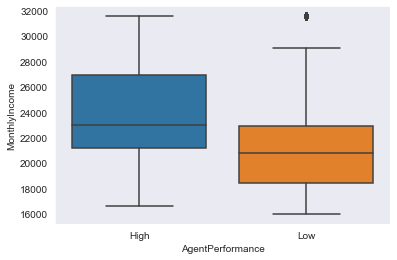

float64


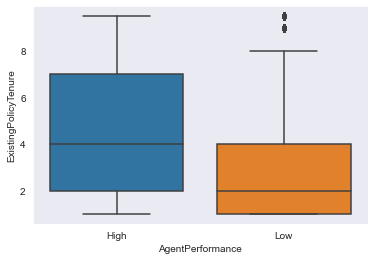

float64


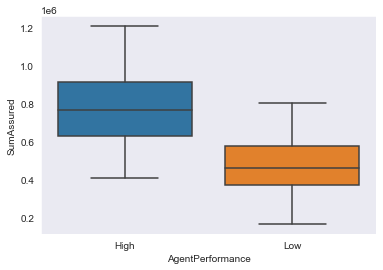

float64


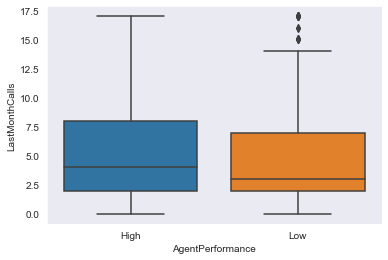

float64


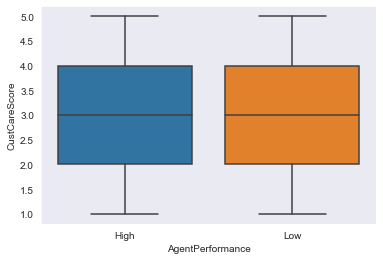

In [46]:
col_names = list(df.select_dtypes(exclude=['object']).columns)
# fig, ax = plt.subplots(len(col_names), figsize=(5,65))
for i,col_val in enumerate(col_names):
    print (df[col_val].dtype)
    sns.boxplot(y=df[col_val],x=df.AgentPerformance)
    ax[i].set_title('{}'.format(col_val), fontsize=8)
    plt.show()

#### Channel Wise Performance

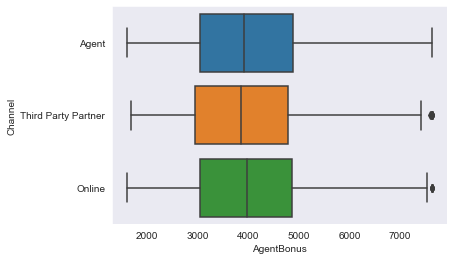

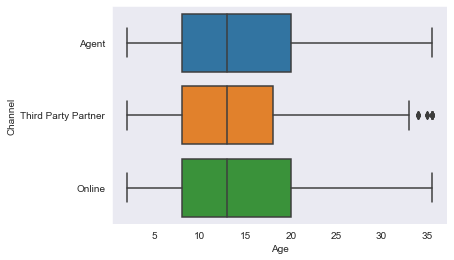

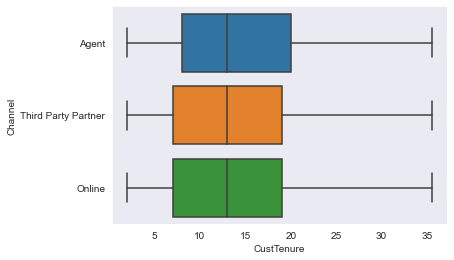

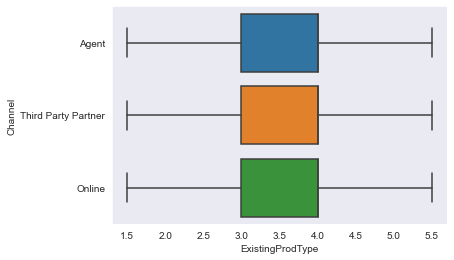

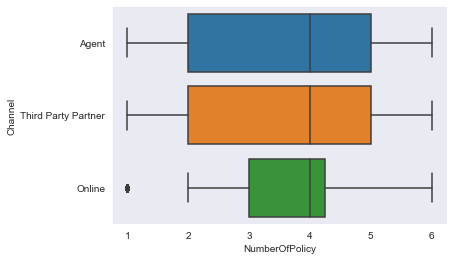

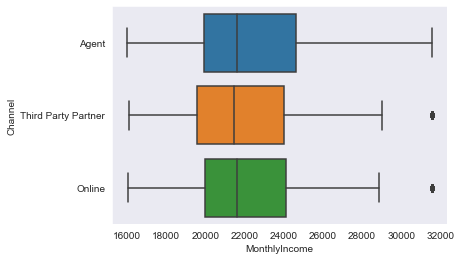

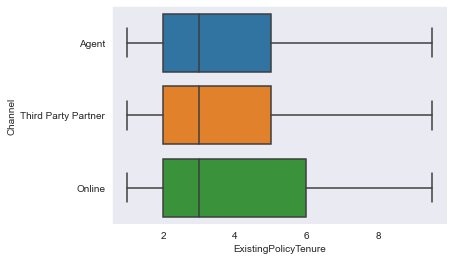

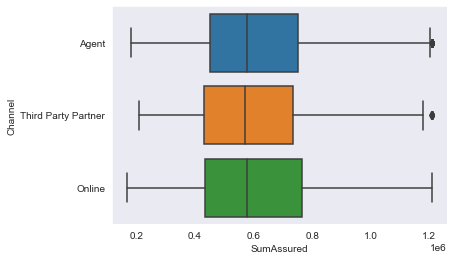

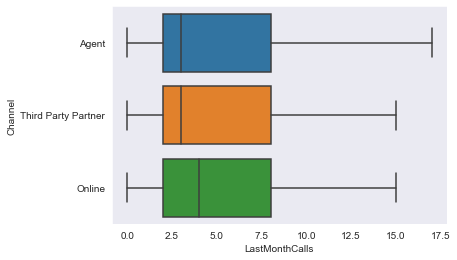

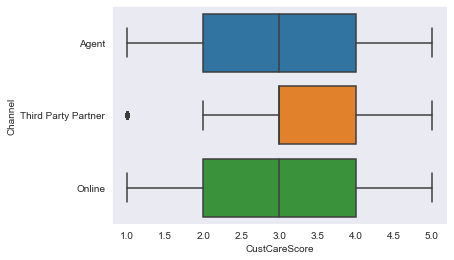

In [50]:
for i,col_val in enumerate(col_names):
    sns.boxplot(x=df[col_val],y=df.Channel,orient="h")
    plt.show()

#### Zone Wise Performance

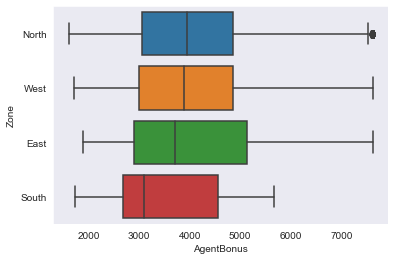

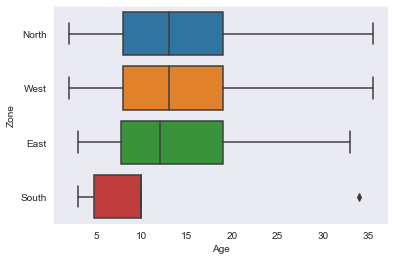

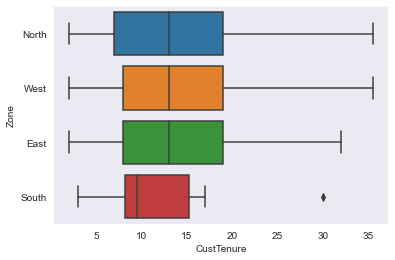

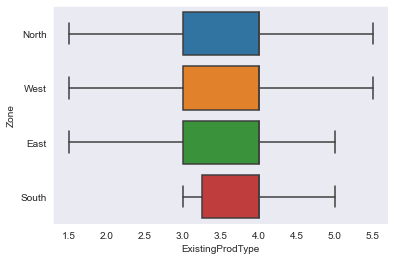

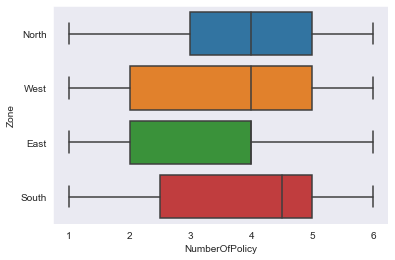

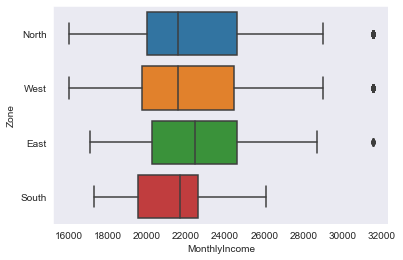

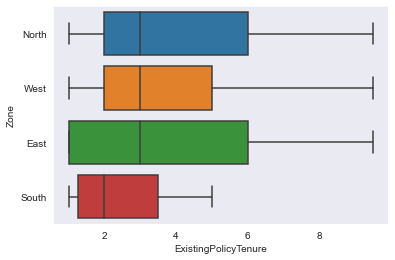

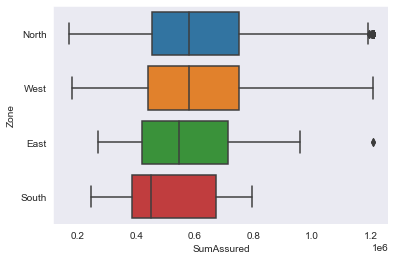

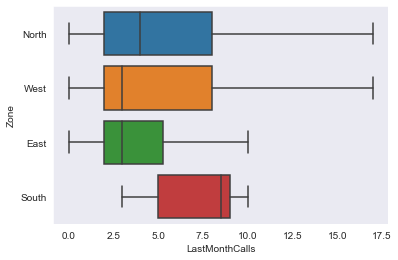

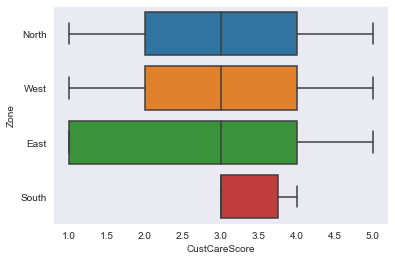

In [49]:
for i,col_val in enumerate(col_names):
    sns.boxplot(x=df[col_val],y=df.Zone,orient="h")
    plt.show()

#### Occupatio Wise Distribution

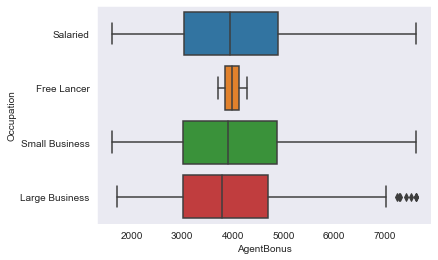

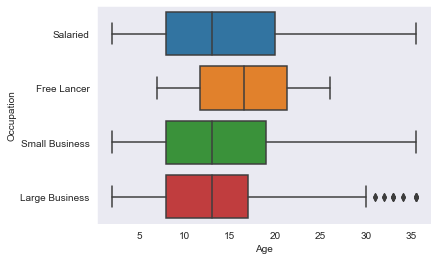

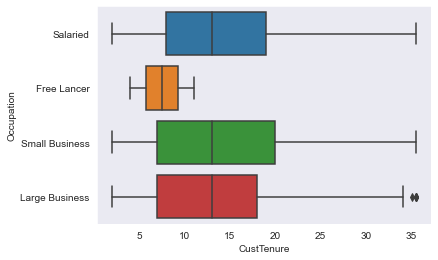

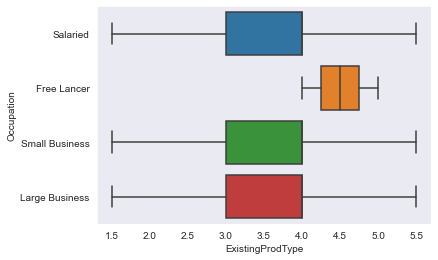

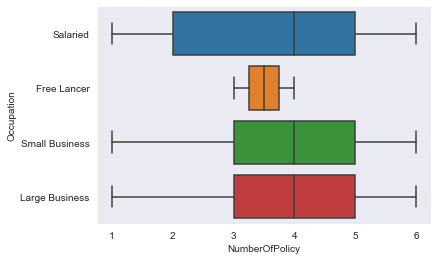

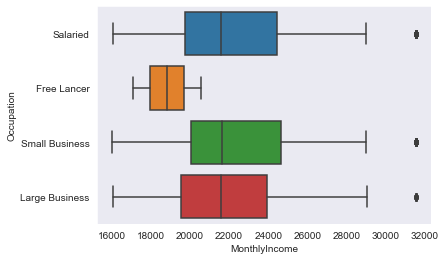

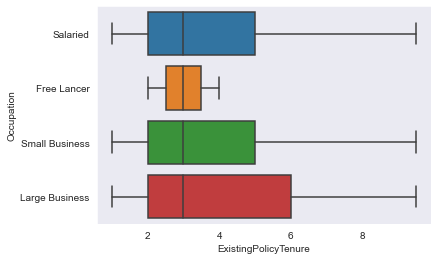

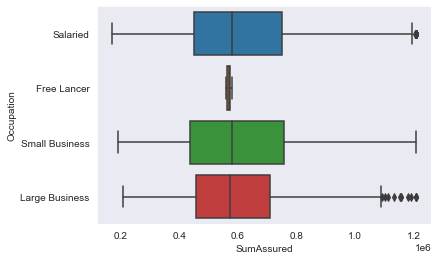

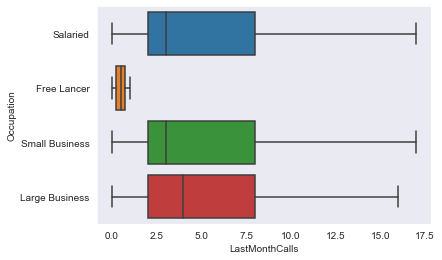

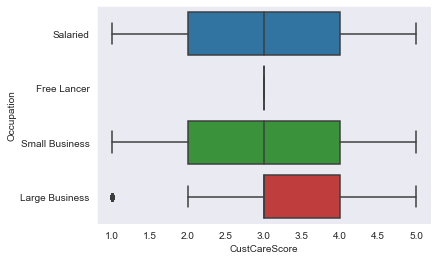

In [51]:
for i,col_val in enumerate(col_names):
    sns.boxplot(x=df[col_val],y=df.Occupation,orient="h")
    plt.show()

#### Education Wise Distribution

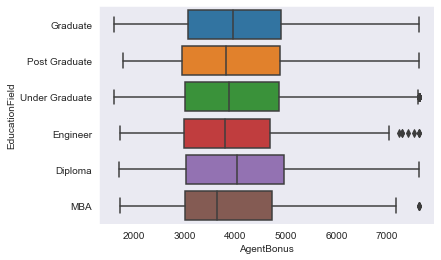

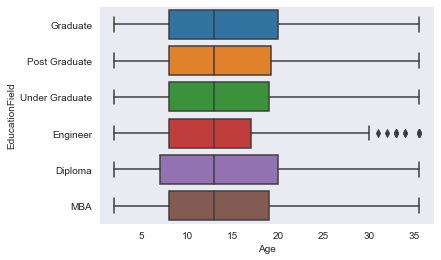

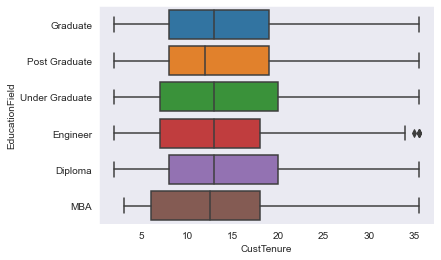

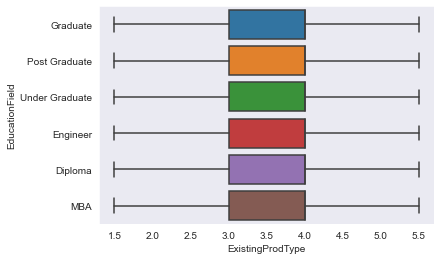

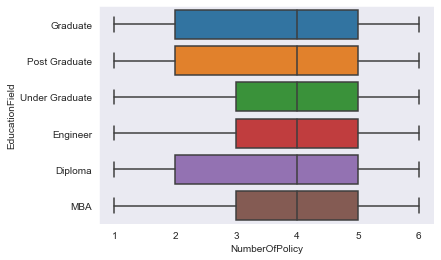

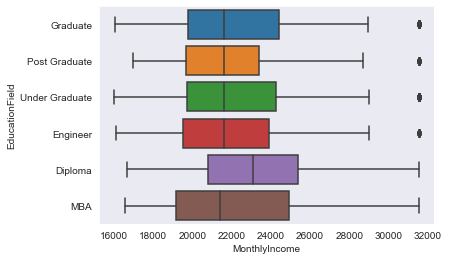

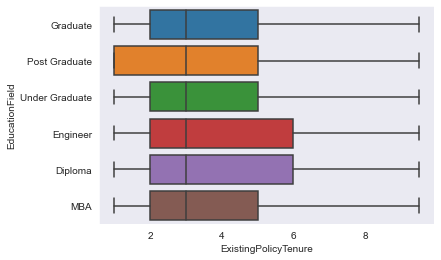

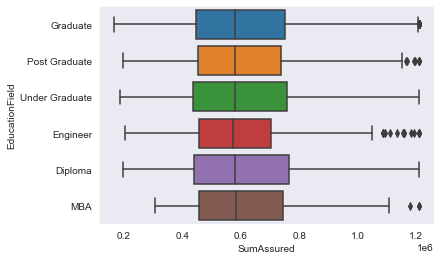

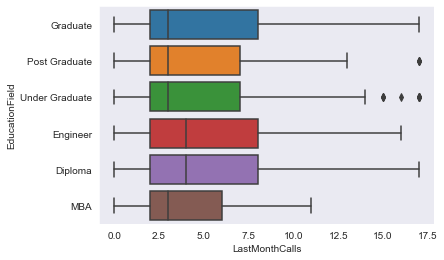

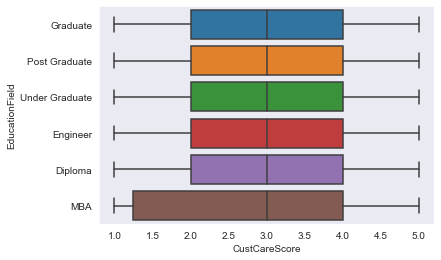

In [52]:
for i,col_val in enumerate(col_names):
    sns.boxplot(x=df[col_val],y=df.EducationField,orient="h")
    plt.show()

#### Designation Wise Distribution

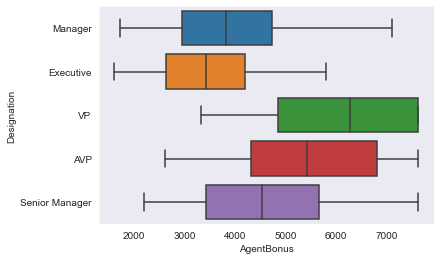

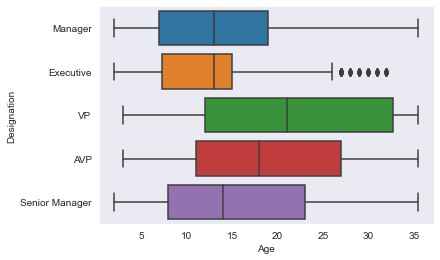

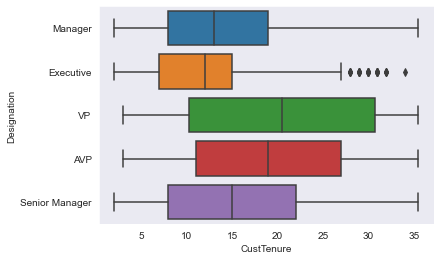

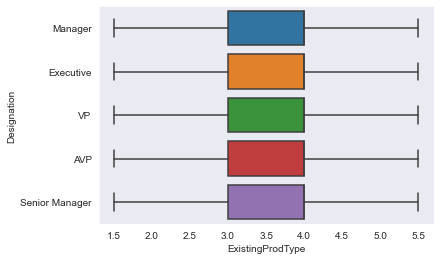

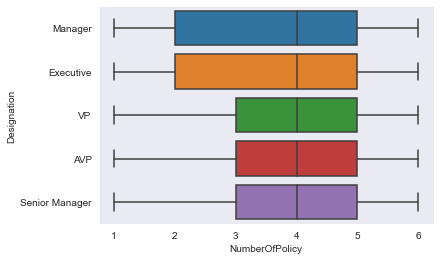

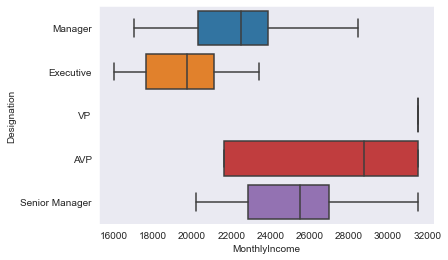

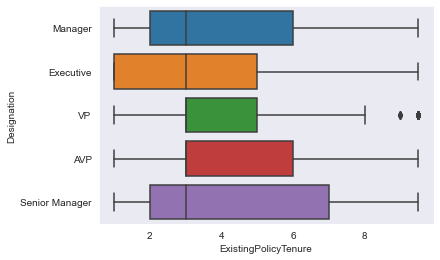

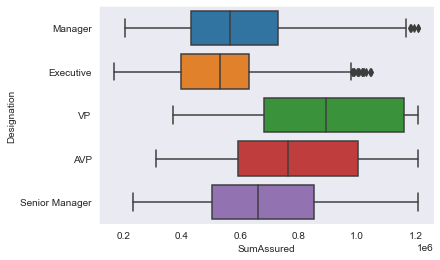

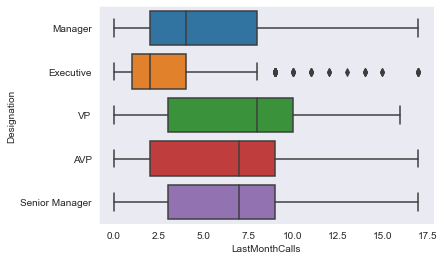

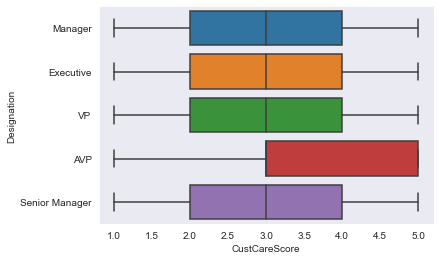

In [53]:
for i,col_val in enumerate(col_names):
    sns.boxplot(x=df[col_val],y=df.Designation,orient="h")
    plt.show()

#### Marital Status

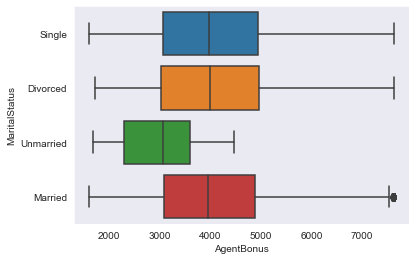

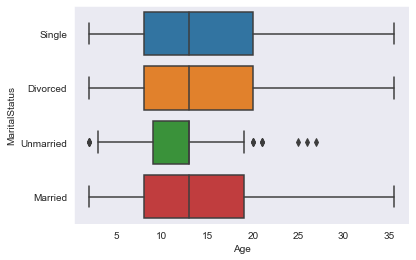

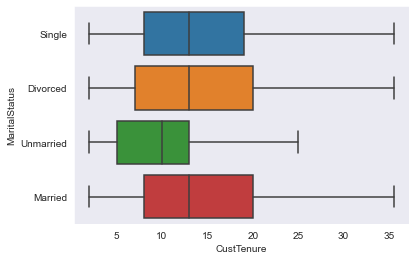

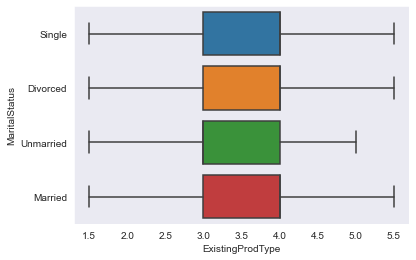

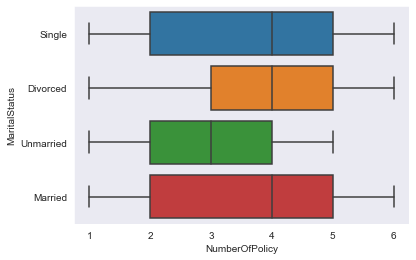

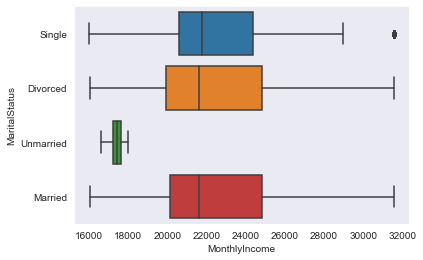

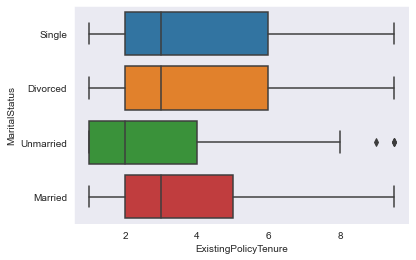

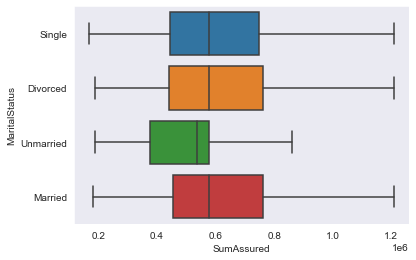

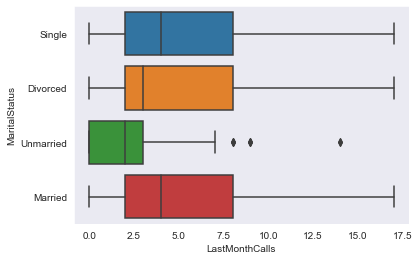

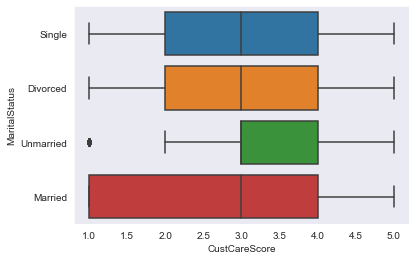

In [54]:
for i,col_val in enumerate(col_names):
    sns.boxplot(x=df[col_val],y=df.MaritalStatus,orient="h")
    plt.show()

#### Payment Method

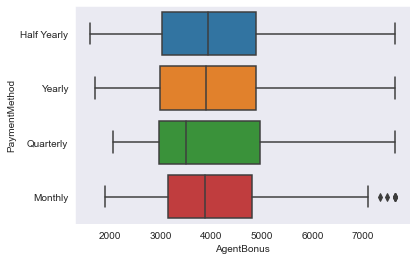

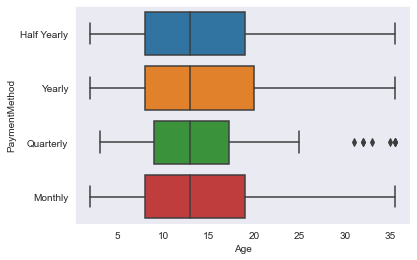

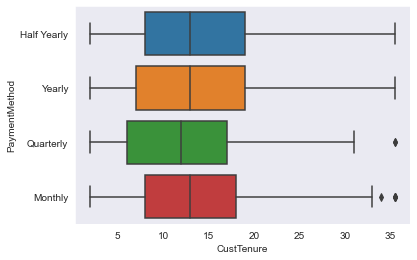

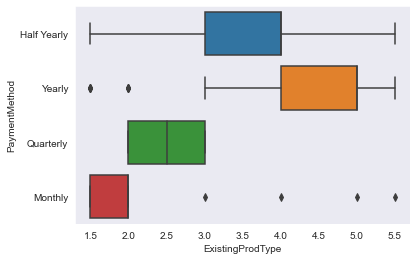

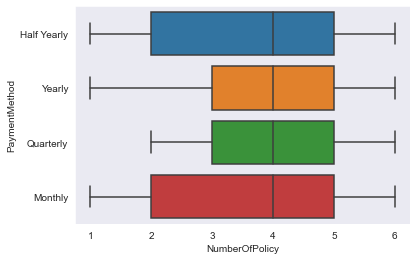

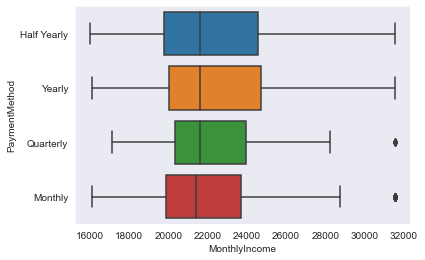

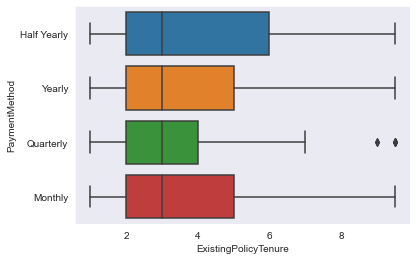

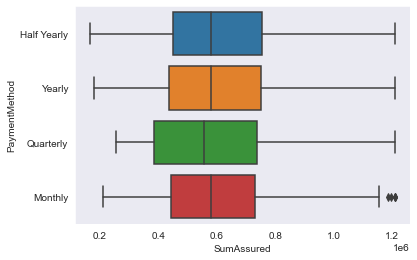

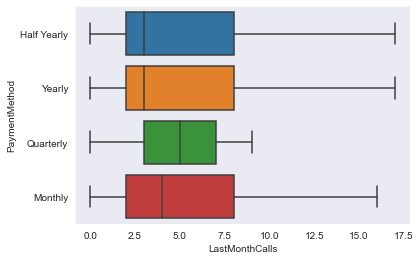

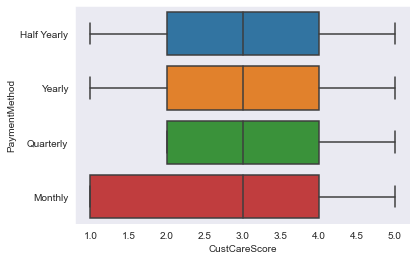

In [55]:
for i,col_val in enumerate(col_names):
    sns.boxplot(x=df[col_val],y=df.PaymentMethod,orient="h")
    plt.show()

### Scatter Plot for Bivariate Analysis

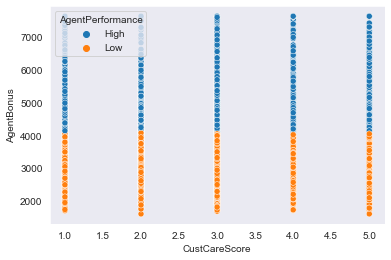

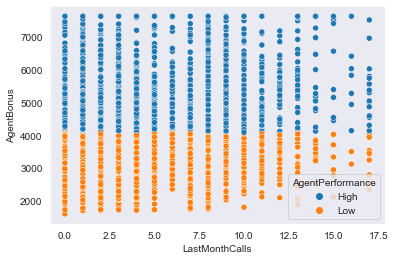

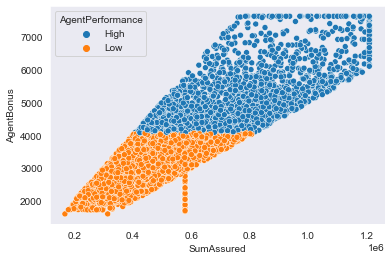

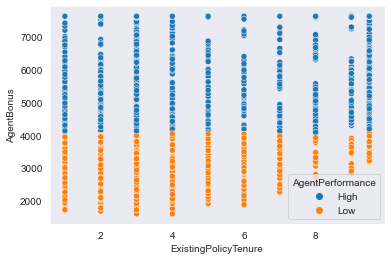

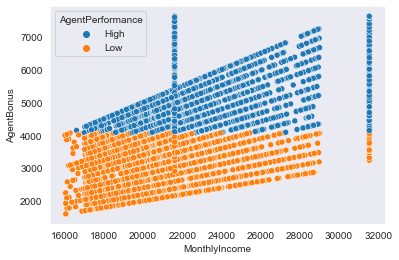

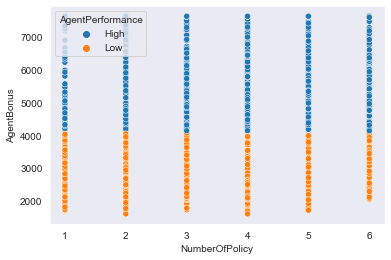

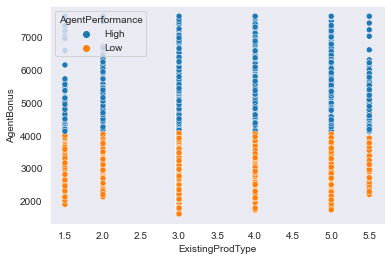

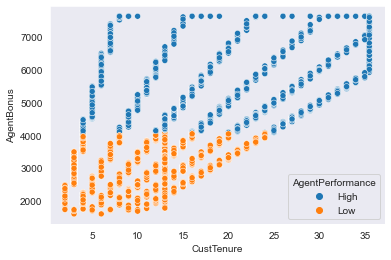

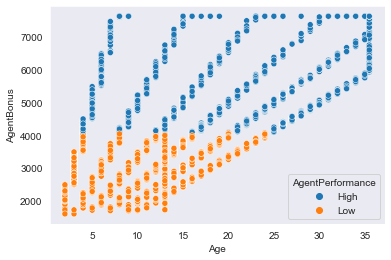

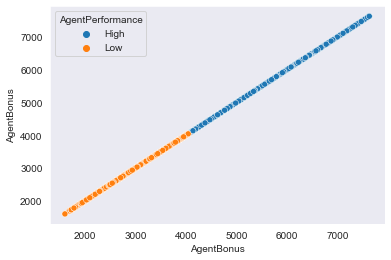

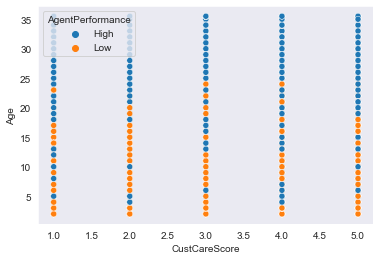

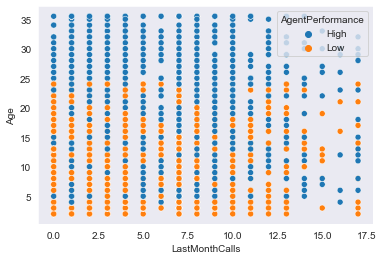

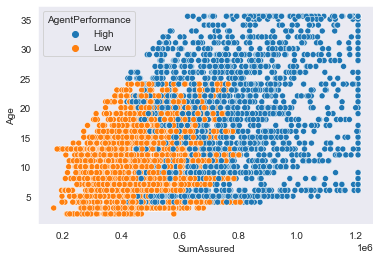

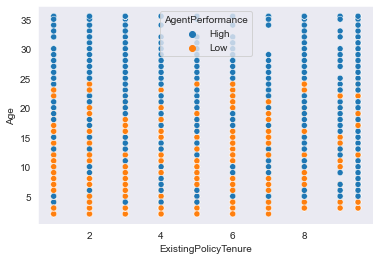

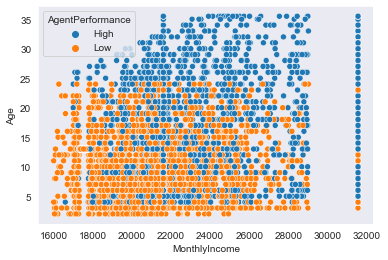

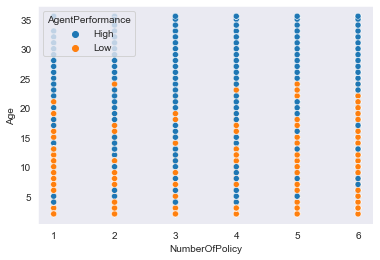

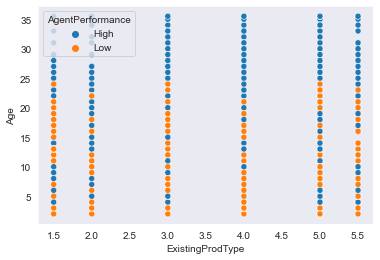

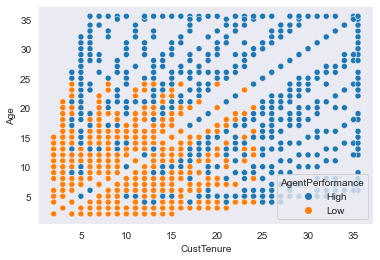

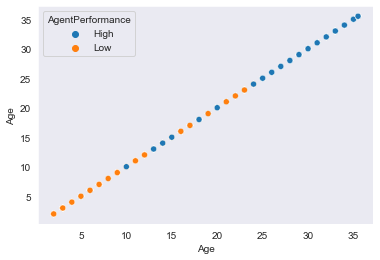

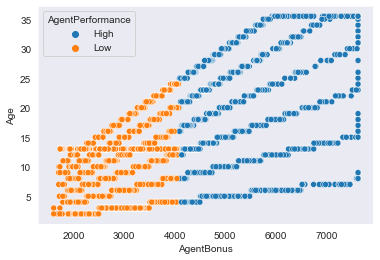

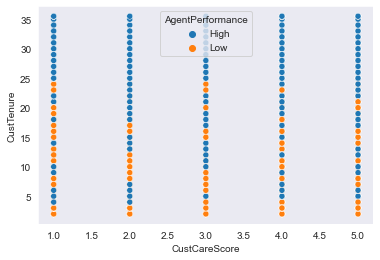

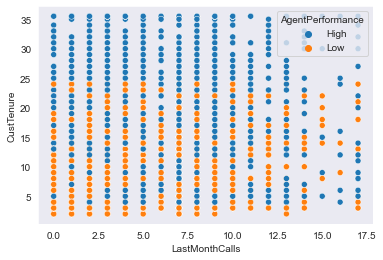

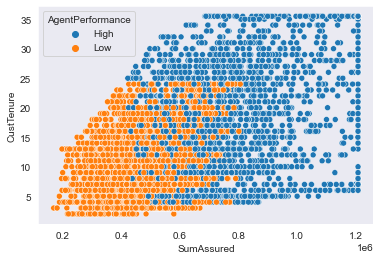

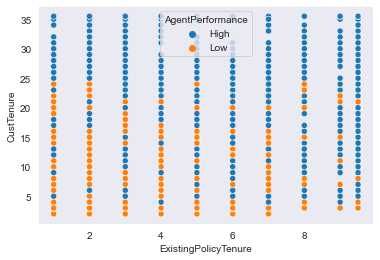

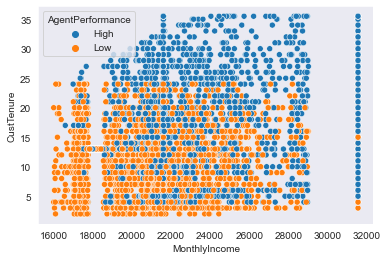

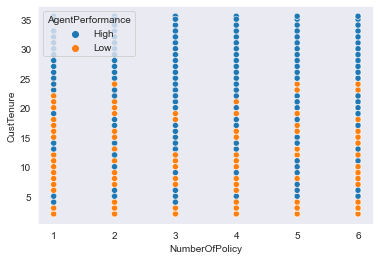

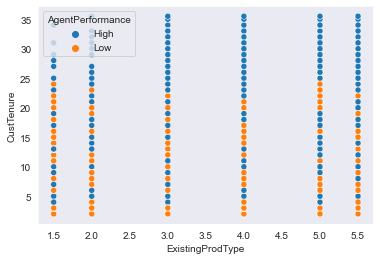

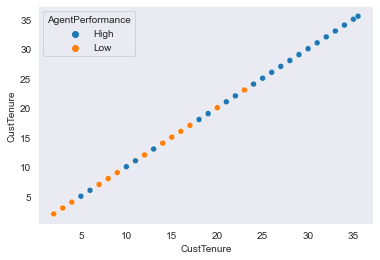

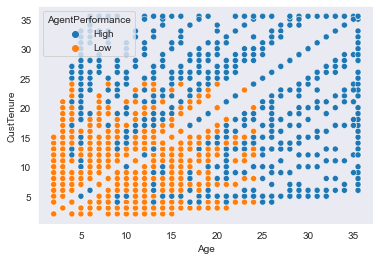

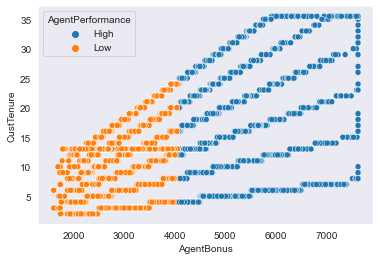

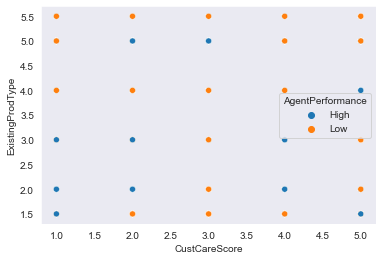

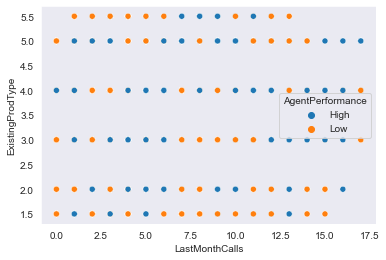

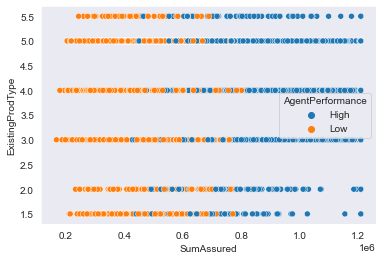

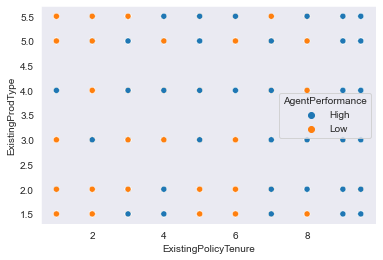

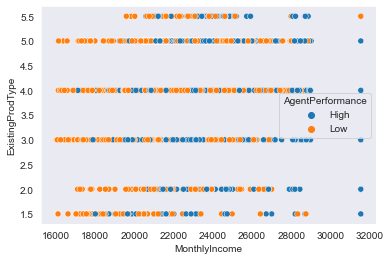

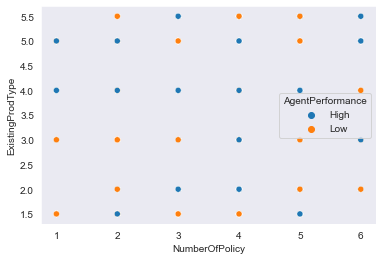

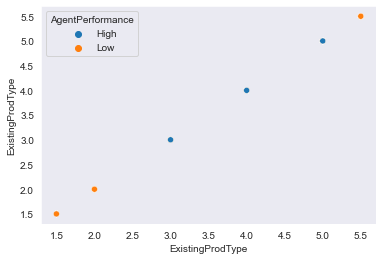

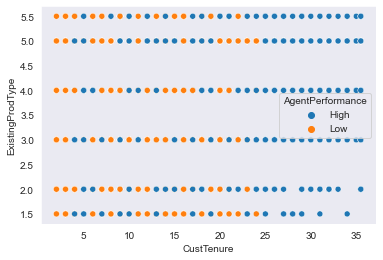

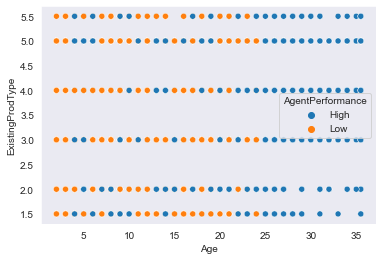

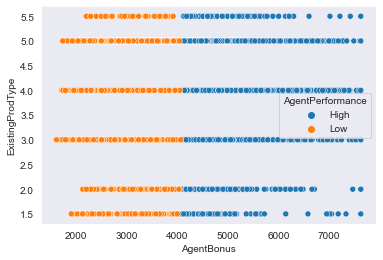

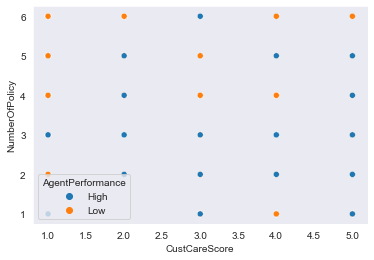

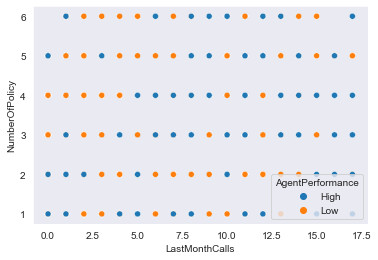

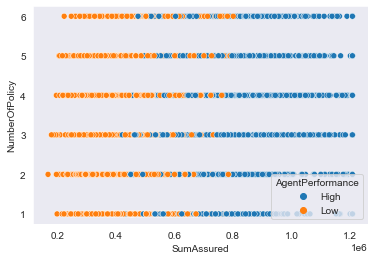

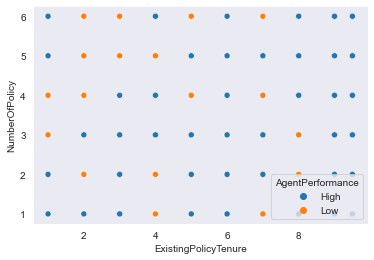

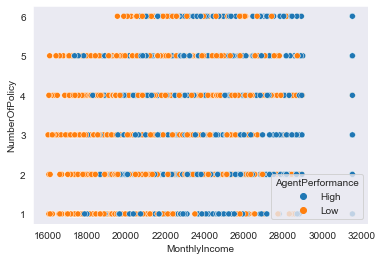

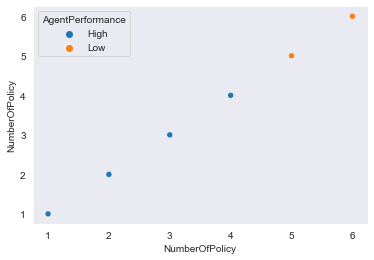

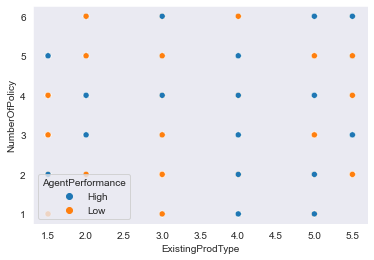

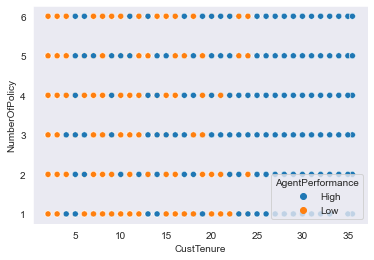

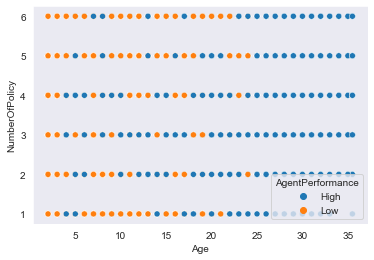

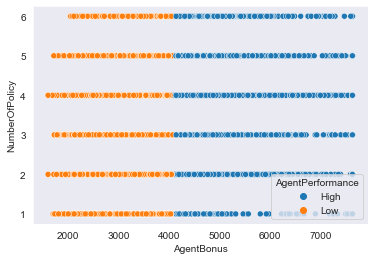

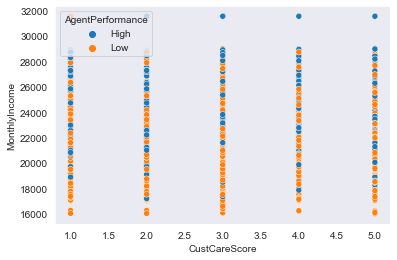

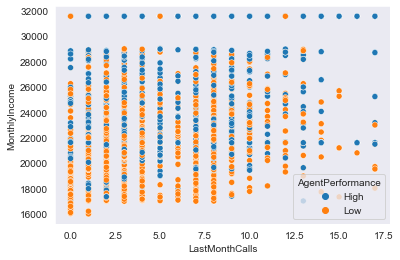

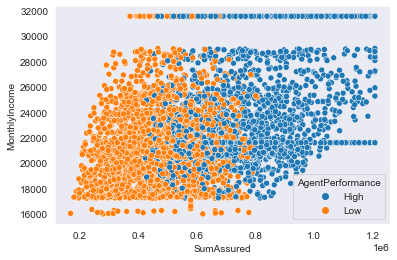

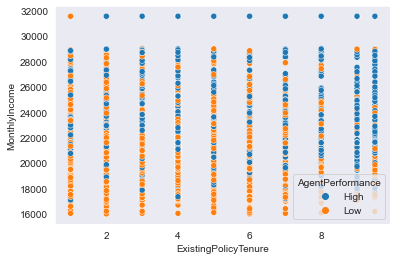

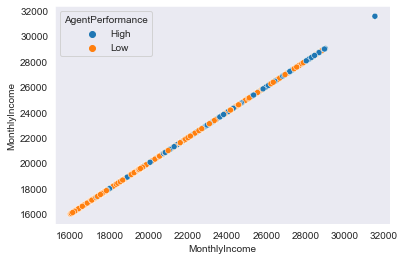

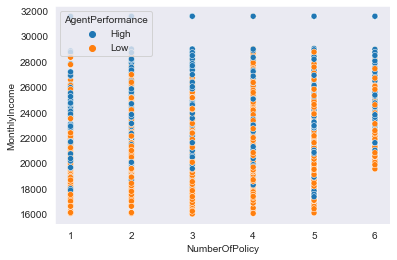

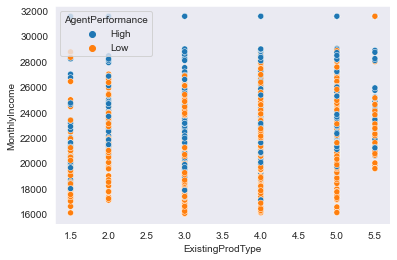

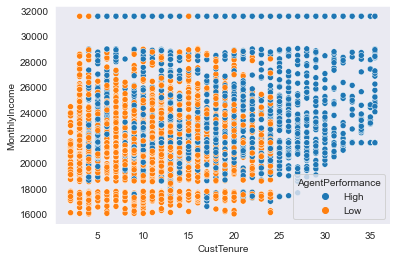

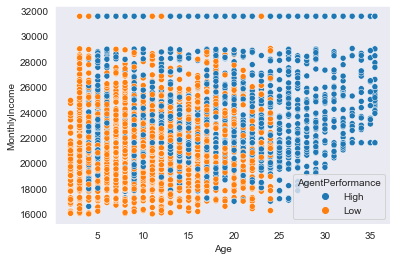

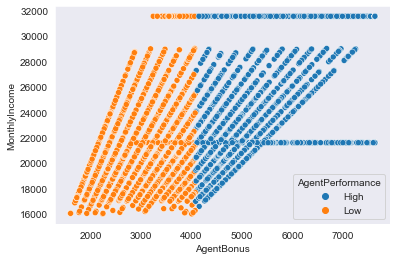

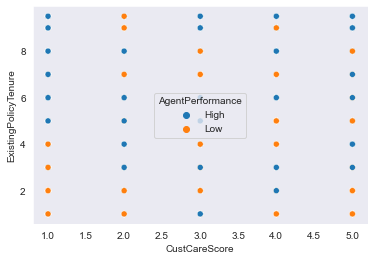

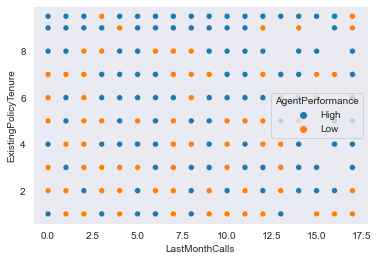

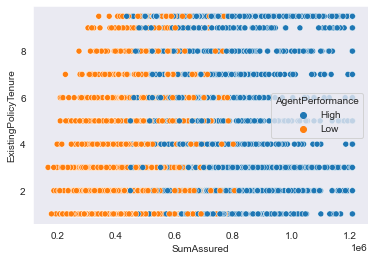

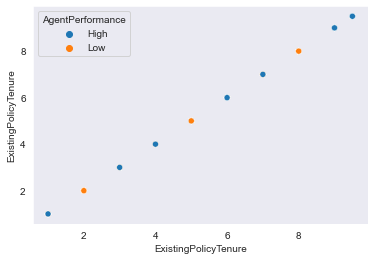

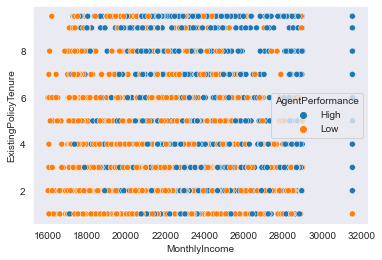

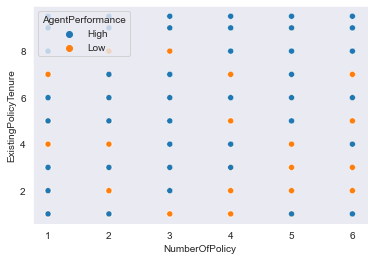

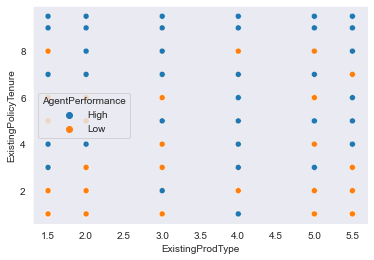

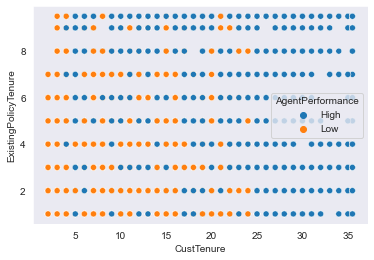

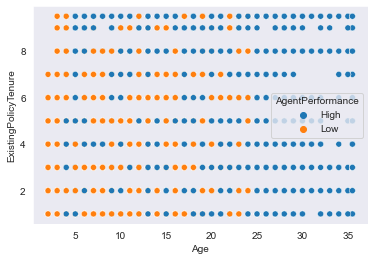

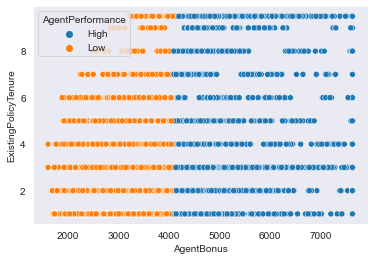

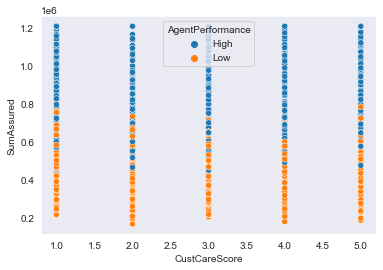

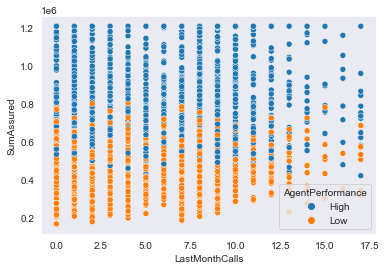

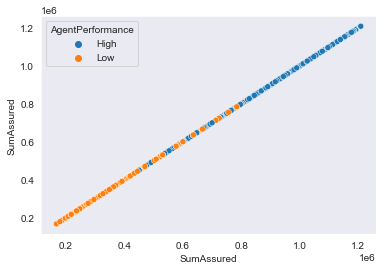

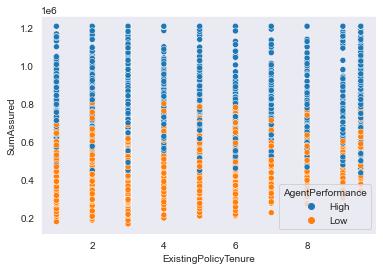

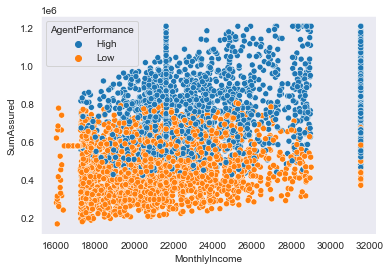

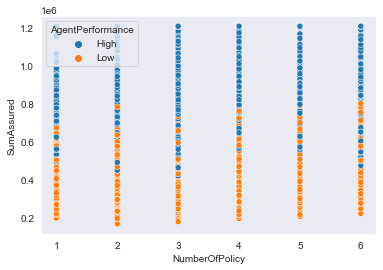

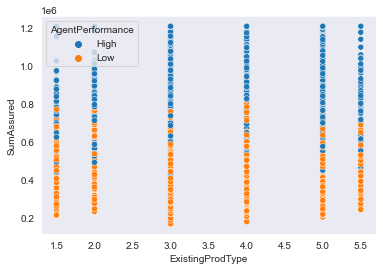

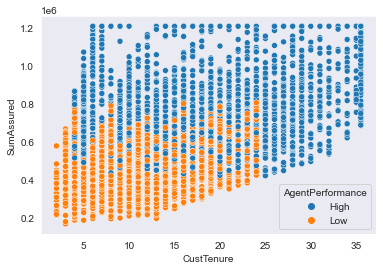

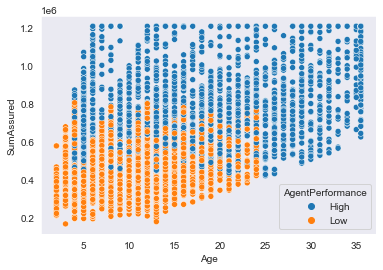

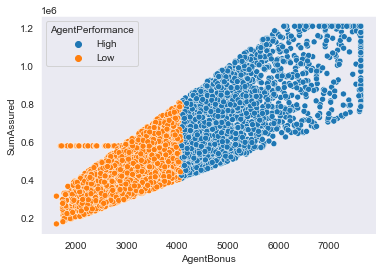

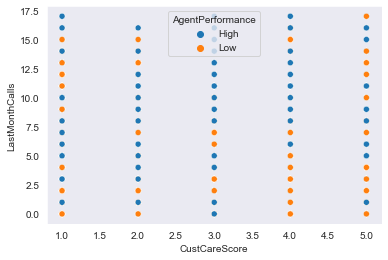

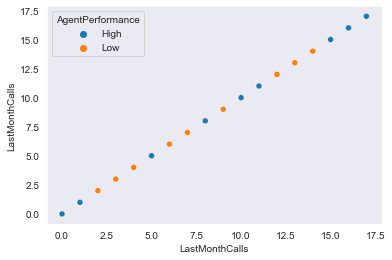

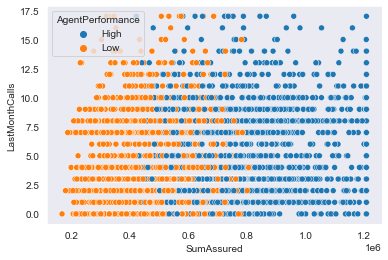

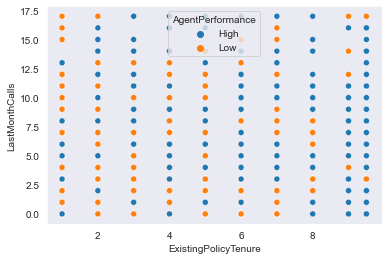

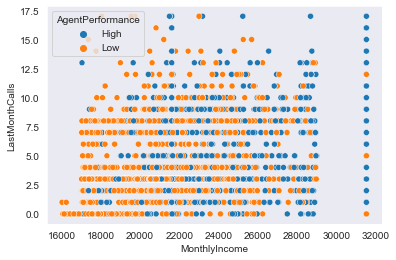

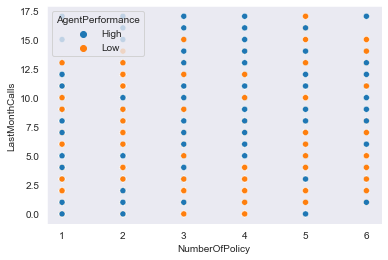

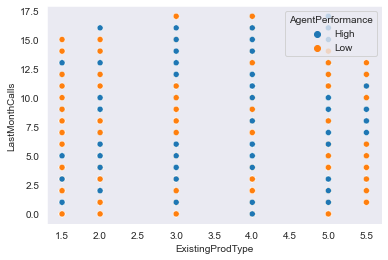

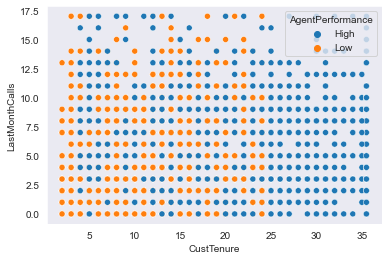

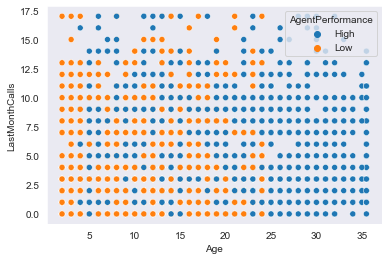

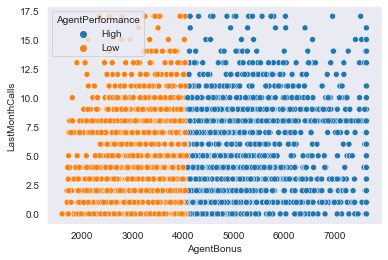

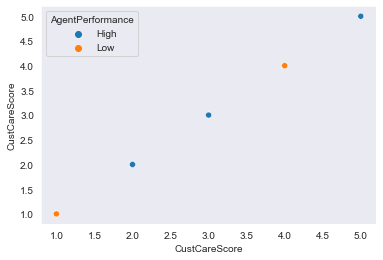

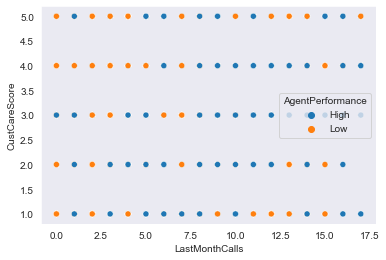

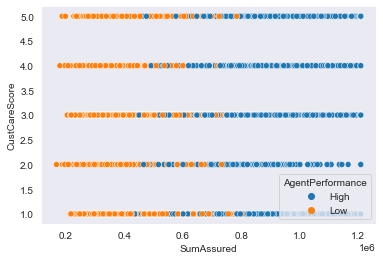

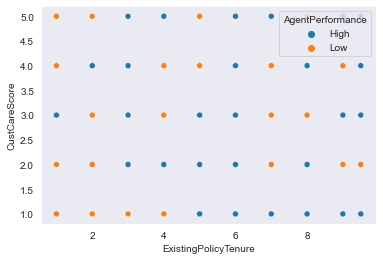

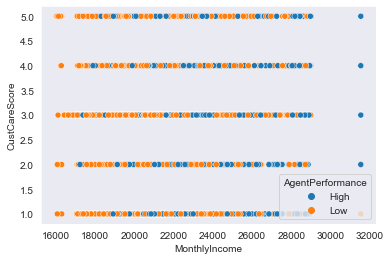

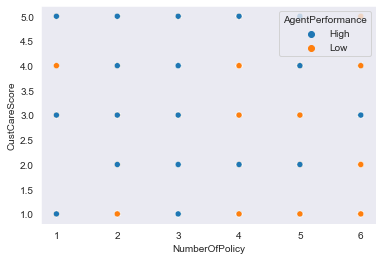

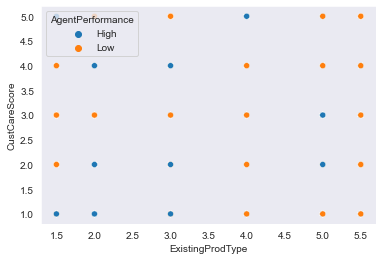

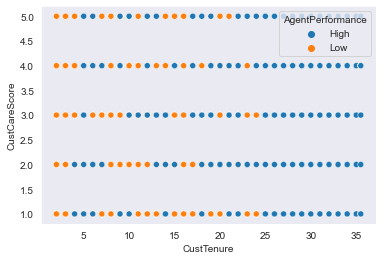

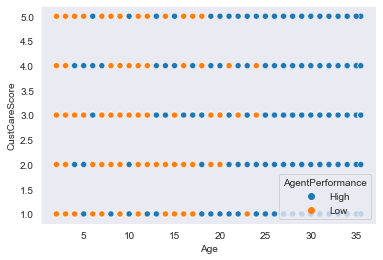

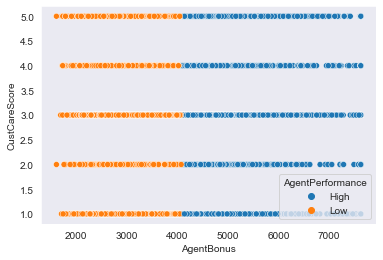

In [58]:
for i,col_val in enumerate(col_names):
    for j,rev_col in reversed(list(enumerate(col_names))):
        sns.scatterplot(y=df[col_val],x=df[rev_col],hue=df.AgentPerformance)
        plt.show()

In [59]:
df.corr()

AgentBonus  Age  CustTenure  ExistingProdType  \
AgentBonus                  1.00 0.53        0.54              0.11   
Age                         0.53 1.00        0.31              0.07   
CustTenure                  0.54 0.31        1.00              0.08   
ExistingProdType            0.11 0.07        0.08              1.00   
NumberOfPolicy              0.08 0.04        0.04              0.15   
MonthlyIncome               0.55 0.30        0.30              0.21   
ExistingPolicyTenure        0.33 0.18        0.17              0.06   
SumAssured                  0.84 0.46        0.46              0.10   
LastMonthCalls              0.20 0.11        0.11              0.03   
CustCareScore               0.02 0.03        0.01              0.00   

                      NumberOfPolicy  MonthlyIncome  ExistingPolicyTenure  \
AgentBonus                      0.08           0.55                  0.33   
Age                             0.04           0.30                  0.18   
CustTenure                      0.04           0.30                  0.17   
ExistingProdType                0.15           0.21                  0.06   
NumberOfPolicy                  1.00           0.14                  0.05   
MonthlyIncome                   0.14           1.00                  0.13   
ExistingPolicyTenure            0.05           0.13                  1.00   
SumAssured                      0.06           0.44                  0.29   
LastMonthCalls                  0.08           0.35                  0.09   
CustCareScore                  -0.00           0.03                 -0.01   

                      SumAssured  LastMonthCalls  CustCareScore  
AgentBonus                  0.84            0.20           0.02  
Age                         0.46            0.11           0.03  
CustTenure                  0.46            0.11           0.01  
ExistingProdType            0.10            0.03           0.00  
NumberOfPolicy              0.06            0.08          -0.00  
MonthlyIncome               0.44            0.35           0.03  
ExistingPolicyTenure        0.29            0.09          -0.01  
SumAssured                  1.00            0.16           0.00  
LastMonthCalls              0.16            1.00           0.01  
CustCareScore               0.00            0.01           1.00

### Correlation Heatmap

<AxesSubplot:>

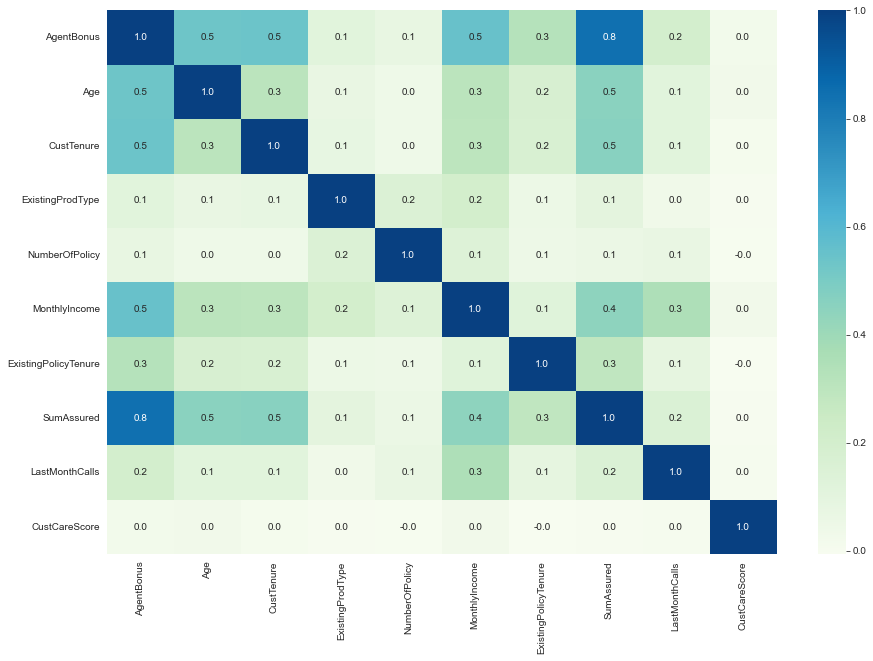

In [62]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt=".1f",square=False,cmap="GnBu")